# AIN212 Fall 2023 Project Assignment
Rating prediction on Women's E-Commerce Clothing Reviews dataset.

### Dataset: We will be working on Women's E-Commerce Clothing Reviews dataset from Kaggle.
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

* Authors: Alperen Demirci(2220765010) & Bora Dere(2220765021)
* Course: AIN212 - Data Science
* Emails: alperendemirci@hacettepe.edu.tr & boradere@hacettepe.edu.tr
* Date: 28/12/2023

* Description: This project is about classifying the reviews of the women who bought clothes from an online shopping site. We will try to predict whether if the customer recommends the product or not. There are columns which are categorical,numerical and textual; so the data preprocessing part can be challenging. We will use the following algorithms: Naive Bayes, Logistic Regression, SVM. We will compare the results of these algorithms and choose the best one. Our aim is to implement a binary classification model with high accuracy complying with data science lifecycle.

## Explaining the dataset:
There are 11 columns in this dataset.
- <span style="color: red;">Clothing ID:</span> Integer Categorical variable that refers to the specific piece being reviewed.
- <span style="color: red;">Age:</span> Positive Integer variable of the reviewers age.
- <span style="color: red;">Title:</span> String variable for the title of the review.
- <span style="color: red;">Review Text:</span> String variable for the review body.
- <span style="color: red;">Rating:</span> Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- <span style="color: green;">Recommended IND:</span> Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- <span style="color: red;">Positive Feedback Count:</span> Positive Integer documenting the number of other customers who found this review positive.
- <span style="color: red;">Division Name:</span> Categorical name of the product high level division.
- <span style="color: red;">Department Name:</span> Categorical name of the product department name.
- <span style="color: red;">Class Name:</span> Categorical name of the product class name.

## Our approach:

* First we need to clean the data. (Remove the null values, remove the unnecessary columns etc.)
* Then we need to visualize the data in order to understand it better.
* After that we will use different classification algorithms to predict the ratings of the reviews.(Naive Bayes, Logistic Regression, SVM etc.)
* We will compare the results of the algorithms and choose the best one.

## Personal Thoughts and Comments:

* Our problem and data are near to SpamClassification problem, we think the fastest and most accurate algorithm will be Naive Bayes.
* Since we are not familiar with deep NLP concepts, we will try to solve this problem using only statistics and essences of data science. In our opinion, this will be challenging but educative for us.
* Our valuable column is based on strings, cleaning the data will be the most challenging part of this project.
* We will try to use the understandable and trackable code as possible.

## Imports and loading the dataset

In [560]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set_theme()

In [561]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = pd.DataFrame(data)

In [562]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Data Preprocessing and Cleaning
First, we check the null values for numerical columns, then for categorical columns.

In [563]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


We do not see any anomaly on Age column (i.e. negative values, etc.) so we can continue.
Range column is also fine, it fits into constraints.

* Quick Note: Unnamed column is a poor attempt to create an index column. So, it is redundant.
Also, we will not use the Clothing ID column, so we will drop them both.

In [564]:
df.drop(columns=['Unnamed: 0', 'Clothing ID'], inplace=True)

In [565]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [566]:
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

As seen, we have 3810 null values in the Title column. In order to solve this problem, we have concataneated the Title and Review Text columns. Then we have dropped the Review Text column.
- Concatanation format is: Title + " " + Review Text
- We did not drop the null values in Review Text columns since customers may just write their reviews into the Title column. (Like Title = "I love it!" and Review Text = null)
- For divison name, department name and class name columns, we have filled the null values with "Unknown" class since we do not have any information on which class they belong to.

In [567]:
# Code for title and review concatanation and removing null values
df['Review Text'] = df['Review Text'].fillna('')
df['Title'] = df['Title'].fillna('')
df['Review'] = df['Title'] + ' ' + df['Review Text']
df.drop(columns=['Title', 'Review Text'], inplace=True)
df.shape

(23486, 8)

In [568]:
# Code for removing empty reviews
empty_reviews = df['Review'].apply(lambda x: x.isspace())
df = df[~empty_reviews]
df.shape

(22642, 8)

In [569]:
df['Division Name'] = df['Division Name'].fillna("Unknown")
df['Department Name'] = df['Department Name'].fillna("Unknown")
df['Class Name'] = df['Class Name'].fillna("Unknown")

* What about the null values in the Review Text column? We have dropped them after the concatanation due to lack of information. We cannot generate fake reviews :)

In [570]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


Let's check for the null values again.

In [571]:
df.isnull().sum()

Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review                     0
dtype: int64

In [572]:
df.shape

(22642, 8)

Since we have 0 null values, we can continue.

## Feature Visualization

We will plot distributions of the data in order to understand it better.

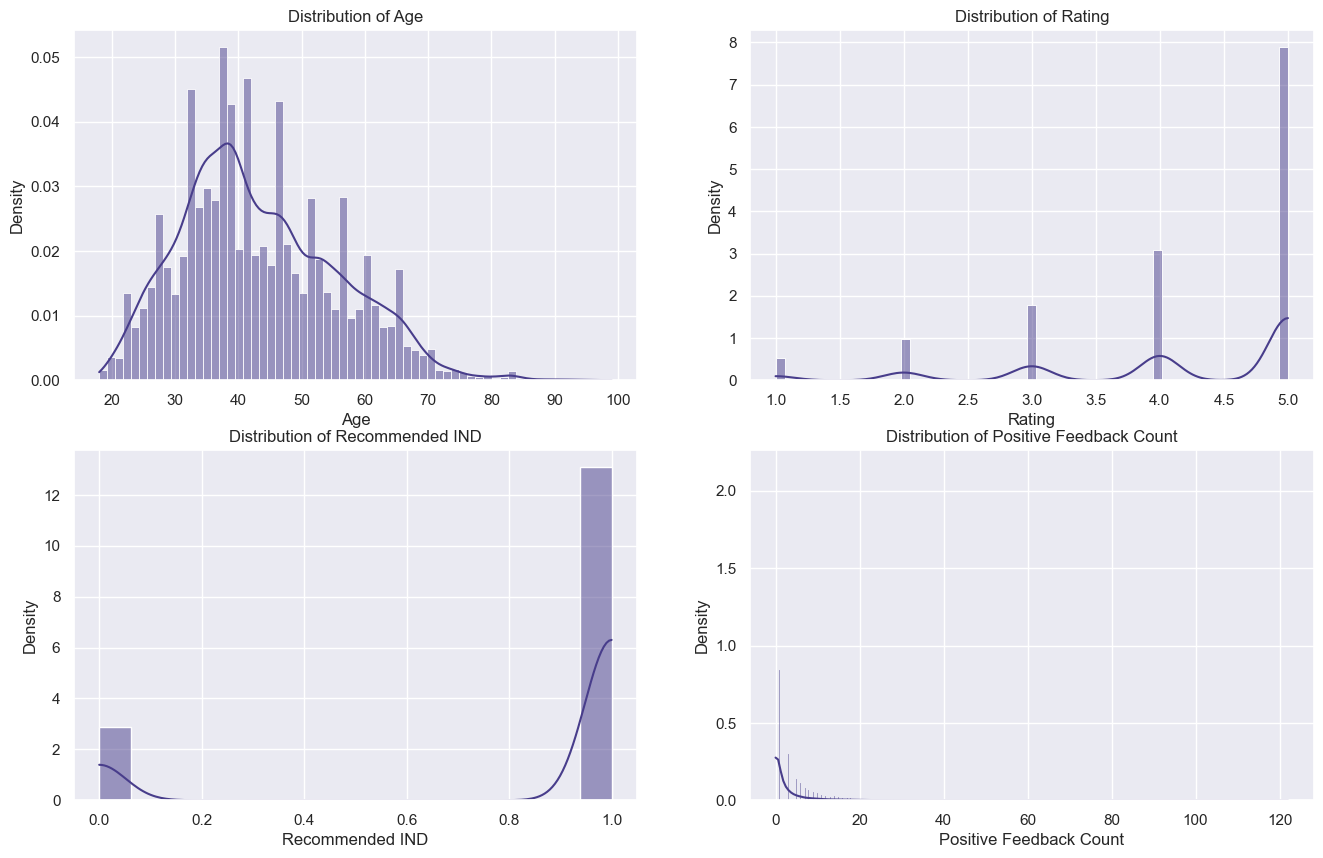

In [573]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df.select_dtypes('number').columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, color='darkslateblue', kde=True, stat='density')
    plt.title(f'Distribution of {col}')

- We see that Age column is noisy but it is similar to normal distribution. That's a good sign because we do not need to apply any transformation on it.
- There are some outliers in the Age column and we will handle them using imputation.
- We see that Recommended IND column is imbalanced. Now there is a class imbalance problem we need to solve.

Finding and handling outliers in Age column.

In [574]:
## Using IQR to find outliers in Age column
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

upper_limit = df['Age'].quantile(0.75) + 1.5*IQR
lower_limit = df['Age'].quantile(0.25) - 1.5*IQR

print(f"Number of outliers: {len(df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)])}")
print(f"Median value: {df['Age'].median()}")
print(f"Mean value: {df['Age'].mean()}")
print(f"Variance of Age column: {df['Age'].var()}")
print(f"Upper bound for the IQR: {upper_limit}")
print(f"Lower bound for the IQR: {lower_limit}")

Number of outliers: 108
Median value: 41.0
Mean value: 43.27978977122162
Variance of Age column: 151.95550248660885
Upper bound for the IQR: 79.0
Lower bound for the IQR: 7.0


In [575]:
df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]['Age'].unique()

array([83, 80, 93, 82, 85, 84, 89, 81, 90, 94, 86, 99, 91, 87, 92])

Now, considering the bounds and unique values of outliers; outliers lay on the upper half of the IQR.

* We have fixed the outliers age to 80 since it is the upper bound of the IQR.

That's because we think that we won't lose much information applying a such trim. The main reason is that since it's an online shopping dataset, we do not expect to see a lot of customers over 80 years old.The number 99 is suspicious too.

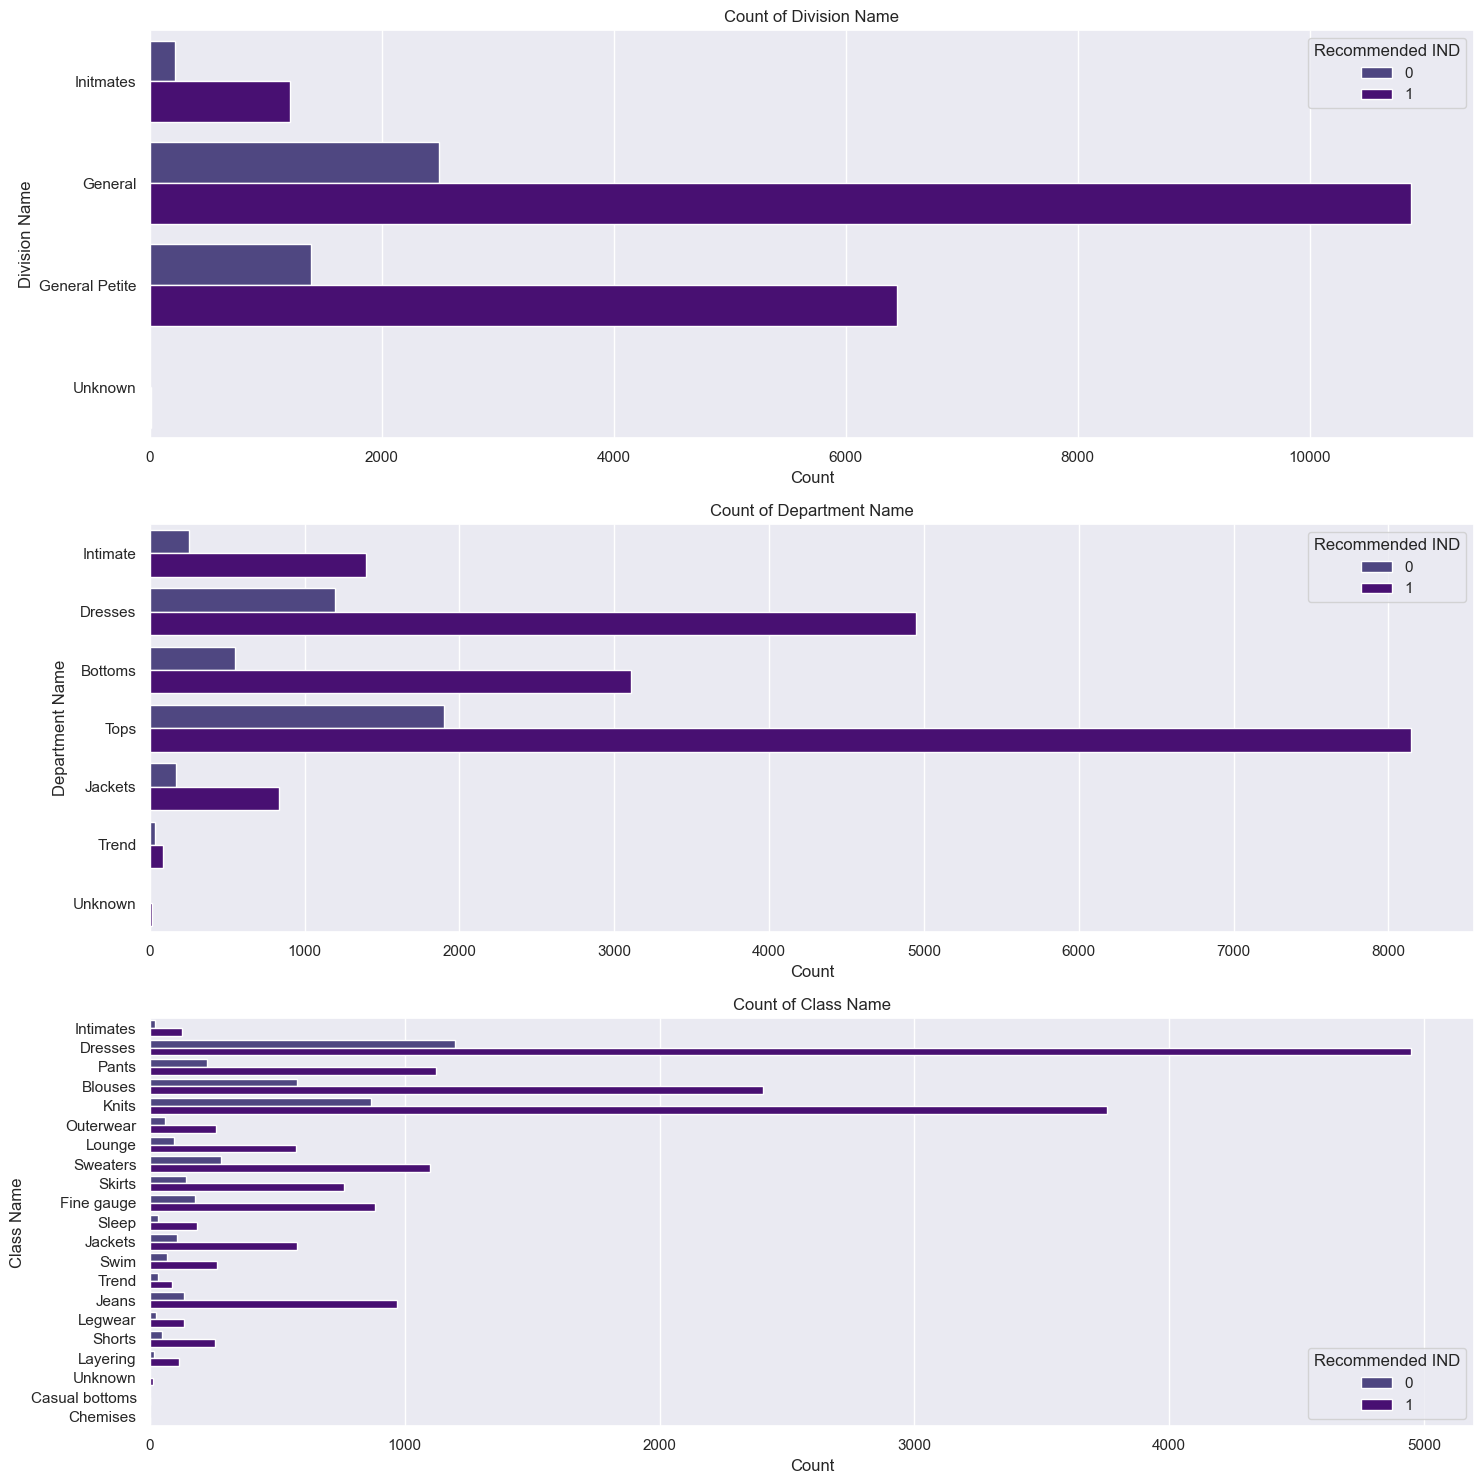

In [576]:
plt.figure(figsize=(15, 15))

cat_cols = ['Division Name', 'Department Name', 'Class Name']

for i, col in enumerate(cat_cols):
    plt.subplot(3, 1, i+1)
    sns.countplot(data=df, y=col, palette=['darkslateblue', 'indigo'], hue='Recommended IND')
    plt.title(f'Count of {col}')
    plt.xlabel('Count')

plt.tight_layout()

There are some rare categories in the Class Name column (Casual bottoms, Chemises). Also in the Department Name column (Trend).
- We may drop them since they are not too much.

We will check the number of entries in these classes and decide if we should drop them.

In [577]:
df['Class Name'].value_counts()

Class Name
Dresses           6146
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Unknown             13
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

Since there are only 1 entries in Casual Bottoms class and 1 entry in Chemises class, we will drop them.

In [578]:
# Code for removing classes with 'Casual bottoms' or 'Chemises'
classes_to_remove = ['Casual bottoms', 'Chemises']
df = df[~df['Class Name'].isin(classes_to_remove)]

In [579]:
df['Class Name'].value_counts()

Class Name
Dresses       6146
Knits         4626
Blouses       2983
Sweaters      1380
Pants         1350
Jeans         1104
Fine gauge    1059
Skirts         903
Jackets        683
Lounge         669
Swim           332
Outerwear      319
Shorts         304
Sleep          214
Legwear        158
Intimates      147
Layering       132
Trend          118
Unknown         13
Name: count, dtype: int64

In [580]:
df['Recommended IND'].value_counts()

Recommended IND
1    18539
0     4101
Name: count, dtype: int64

* Here is the place that we will solve our class imbalance problem.

* There are three ways to solve this problem:
    1. Oversampling
    2. Undersampling
    3. SMOTE

* We would use SMOTE but one class has 4101 entry whilst the other has 18539 entry.
* This means that we need to generate more than 3x of the smallest classed fake entries for balancing. We do not think that would be a good idea since the ratio is too high.
* Thus, we will use undersampling to solve this problem.

* We will randomly select 4101 entries from the class 1 and drop the rest of them.
* This will solve our class imbalance problem.

### Positive Sides:
* We will have a balanced dataset.
* Our models will not be biased.

### Negative Sides:
* We will lose a lot of information.
* We will lose the correlation between the features and the rating.

In [581]:
sample_size = df['Recommended IND'].value_counts().min()
df = df.groupby('Recommended IND').apply(lambda x: x.sample(sample_size)).reset_index(drop=True)
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,39,3,0,1,General,Tops,Knits,Cute but not comfortable I was wondering wheth...
1,45,2,0,10,General,Tops,Sweaters,I had such high hopes! Oh how i love moth swea...
2,39,3,0,12,General Petite,Tops,Knits,This top runs both small and true to size This...
3,78,2,0,2,General Petite,Dresses,Dresses,Very disappointing!!!! I've been eyeing this d...
4,50,3,0,0,General Petite,Dresses,Dresses,I ordered this online and was completely unde...


In [582]:
df.value_counts('Recommended IND')

Recommended IND
0    4101
1    4101
Name: count, dtype: int64

As you can see our dataset is balanced now.

### Result of the data preprocessing
* We have dropped nearly %3.6 of the data due to emptiness. (null reviews)
* We have dropped unnecessary columns since they are not useful for us.
* We have trimmed the outliers in Age column by fixing the max to 80(upper bound for IQR).
* We have dropped the rare classes in Class Name column.
* We have solved the class imbalance problem by undersampling.

## Feature Engineering

* We will check for the unique values of the columns in order to understand the data better.

In [583]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Age: 74
Rating: 5
Recommended IND: 2
Positive Feedback Count: 60
Division Name: 4
Department Name: 7
Class Name: 19
Review: 8202


* Recommended IND column is already binary, so we will not touch it.

* Since Class Name, Department Name and Division Name columns are categorical, we will use One Hot Encoding for them. One Hot encoding because we do not want to give them any order!

* Rating column is already ordinal, so we will not touch it.

* Other columns do not seem to have any problem.

In [584]:
# Code for One Hot Encoding of division, department and class columns

df = pd.get_dummies(df,columns=['Division Name','Department Name','Class Name'],drop_first=True)

In [585]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

Age: int64
Rating: int64
Recommended IND: int64
Positive Feedback Count: int64
Review: object
Division Name_General Petite: bool
Division Name_Initmates: bool
Division Name_Unknown: bool
Department Name_Dresses: bool
Department Name_Intimate: bool
Department Name_Jackets: bool
Department Name_Tops: bool
Department Name_Trend: bool
Department Name_Unknown: bool
Class Name_Dresses: bool
Class Name_Fine gauge: bool
Class Name_Intimates: bool
Class Name_Jackets: bool
Class Name_Jeans: bool
Class Name_Knits: bool
Class Name_Layering: bool
Class Name_Legwear: bool
Class Name_Lounge: bool
Class Name_Outerwear: bool
Class Name_Pants: bool
Class Name_Shorts: bool
Class Name_Skirts: bool
Class Name_Sleep: bool
Class Name_Sweaters: bool
Class Name_Swim: bool
Class Name_Trend: bool
Class Name_Unknown: bool


In [586]:
df.columns

Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Review',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Division Name_Unknown', 'Department Name_Dresses',
       'Department Name_Intimate', 'Department Name_Jackets',
       'Department Name_Tops', 'Department Name_Trend',
       'Department Name_Unknown', 'Class Name_Dresses',
       'Class Name_Fine gauge', 'Class Name_Intimates', 'Class Name_Jackets',
       'Class Name_Jeans', 'Class Name_Knits', 'Class Name_Layering',
       'Class Name_Legwear', 'Class Name_Lounge', 'Class Name_Outerwear',
       'Class Name_Pants', 'Class Name_Shorts', 'Class Name_Skirts',
       'Class Name_Sleep', 'Class Name_Sweaters', 'Class Name_Swim',
       'Class Name_Trend', 'Class Name_Unknown'],
      dtype='object')

### How to use the Review column?
1. We can use it as it is? No, because it is a string and we need to convert it to numerical values.
2. We can use it as it is and use a model that can handle strings? No, because we do not have enough computational power to do that.

### Here is our solution:

* We can count the number of words in the review. There may be a correlation between the number of words and the rating. We will check it later.

* We can extract the mean of the words used. People who use more complex words may give higher or lower ratings. We will check it later.

* We can compute the sentiment of the review. There may be a correlation between the sentiment and the rating. We will check it later.

Let's start with the first one.

In [587]:
df['num_of_words'] = df['Review'].apply(lambda x: len(x.split()))

Now the second one.

In [588]:
df['mean_word_length'] = df['Review'].apply(lambda x: np.mean([len(word) for word in x.split()]))

Lastly third one.

* For this we'll use nltk library.
* There is a SentimentIntensityAnalyzer class in this package. We will use it to compute the sentiment of the reviews.

* This class gives us 3 values: negative, neutral and positive. We will use them as features.

Lets see and example.

In [589]:

# Use this code when running for the first time

# import nltk
# nltk.download() ## Downloading necessary packages for text preprocessing


In [590]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentence = "Too big/so soft,I should have exchanged it for a smaller size, but i wanted to wear it, so my mistake. i tend to wear size 12-14, and the large is entirely too big. it also had piling right out of the bag. but it is just so soft that i tore the tag off and wore it anyway. if you get this, size down for sure."
sentiment_score = analyzer.polarity_scores(sentence)
sentiment_score

{'neg': 0.053, 'neu': 0.903, 'pos': 0.044, 'compound': -0.145}

The review : "Too big/so soft,I should have exchanged it for a smaller size, but i wanted to wear it, so my mistake. i tend to wear size 12-14, and the large is entirely too big. it also had piling right out of the bag. but it is just so soft that i tore the tag off and wore it anyway. if you get this, size down for sure."

You can see that the problem is indeed in the customer. But it's a bad review. As you can see the compound value is -0.0145 which is negative but not intensely. So we can say that this review is near to neutral since neu = 0.903.

* Let's implement this to our dataset.

In [591]:
df['positive_sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['negative_sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neutral_sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

In [592]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Review,Division Name_General Petite,Division Name_Initmates,Division Name_Unknown,Department Name_Dresses,Department Name_Intimate,...,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Class Name_Unknown,num_of_words,mean_word_length,positive_sentiment,negative_sentiment,neutral_sentiment
0,39,3,0,1,Cute but not comfortable I was wondering wheth...,False,False,False,False,False,...,False,False,False,False,False,96,4.479167,0.093,0.120,0.787
1,45,2,0,10,I had such high hopes! Oh how i love moth swea...,False,False,False,False,False,...,False,True,False,False,False,72,4.277778,0.320,0.116,0.565
2,39,3,0,12,This top runs both small and true to size This...,True,False,False,False,False,...,False,False,False,False,False,116,3.681034,0.121,0.022,0.856
3,78,2,0,2,Very disappointing!!!! I've been eyeing this d...,True,False,False,True,False,...,False,False,False,False,False,55,4.290909,0.109,0.039,0.852
4,50,3,0,0,I ordered this online and was completely unde...,True,False,False,True,False,...,False,False,False,False,False,40,4.225000,0.148,0.033,0.819


Let's check the correlation between our new columns and the rating.

[]

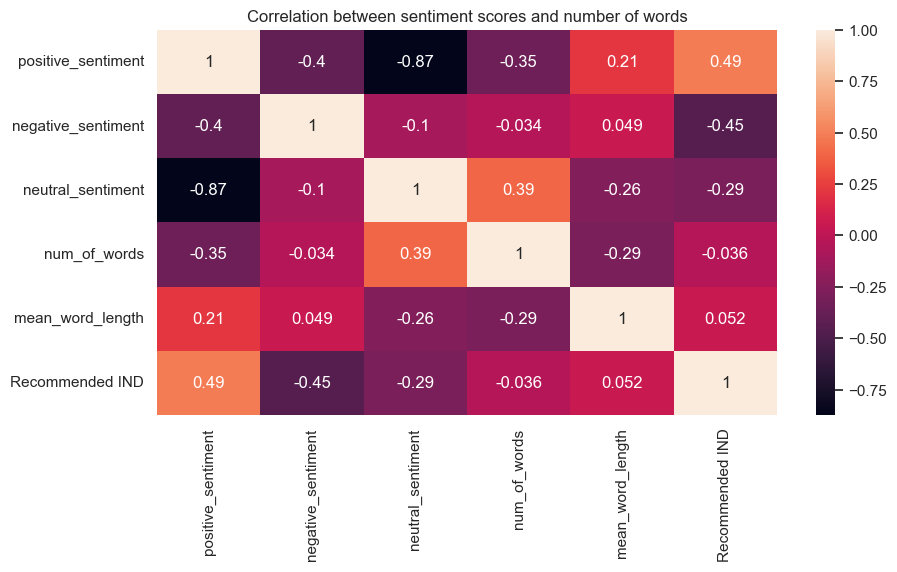

In [593]:
l1 = ['positive_sentiment','negative_sentiment','neutral_sentiment','num_of_words','mean_word_length','Recommended IND']
plt.figure(figsize=(10,5))
plt.title("Correlation between sentiment scores and number of words")
sns.heatmap(df[l1].corr(),annot=True)
plt.plot()

* As seen there is a high correleation between the number of words and the sentiment. We will use this feature.
* Also there is a high correlation (0.4) between the number of words and the neutral sentiment. We will use this feature too.
* mean_of_words and positive sentiment and neutral sentiment have a high correlation (0.18,-0.23) too. We will use this feature too.

In [594]:
df.drop('Review',inplace=True,axis=1)

In [595]:
print("Columns : ",df.columns)
print("Number of columns : ",len(df.columns))

Columns :  Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Division Name_Unknown', 'Department Name_Dresses',
       'Department Name_Intimate', 'Department Name_Jackets',
       'Department Name_Tops', 'Department Name_Trend',
       'Department Name_Unknown', 'Class Name_Dresses',
       'Class Name_Fine gauge', 'Class Name_Intimates', 'Class Name_Jackets',
       'Class Name_Jeans', 'Class Name_Knits', 'Class Name_Layering',
       'Class Name_Legwear', 'Class Name_Lounge', 'Class Name_Outerwear',
       'Class Name_Pants', 'Class Name_Shorts', 'Class Name_Skirts',
       'Class Name_Sleep', 'Class Name_Sweaters', 'Class Name_Swim',
       'Class Name_Trend', 'Class Name_Unknown', 'num_of_words',
       'mean_word_length', 'positive_sentiment', 'negative_sentiment',
       'neutral_sentiment'],
      dtype='object')
Number of columns :  36


### Result of the feature engineering
* We have converted the binary columns to 0 and 1.
* We have used One Hot Encoding for the categorical columns.
* We have added 5 new features to our dataset.
* We have dropped the Review column since we have extracted the features from it.

We have completed the feature engineering part. Now we can continue with the Data Exploration.

## Normalization

* We need to normalize the columns because we don't want to give more importance to a column just because it has higher values.
* We will use Standart Scaler for this which standardize the data around the N(0,1).

In [596]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_x = df.drop('Recommended IND',axis=1)
df_x = pd.DataFrame(scaler.fit_transform(df_x),columns=df_x.columns)
df = pd.concat([df_x,df['Recommended IND']],axis=1)

In [597]:
df.head()

,Age,Rating,Positive Feedback Count,Division Name_General Petite,Division Name_Initmates,Division Name_Unknown,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,...,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Class Name_Unknown,num_of_words,mean_word_length,positive_sentiment,negative_sentiment,neutral_sentiment,Recommended IND
0,-0.321932,-0.327174,-0.327073,-0.720535,-0.245713,-0.015617,-0.624635,-0.265476,-0.217352,1.094956,...,-0.265739,-0.123896,-0.07344,-0.015617,1.117788,0.671063,-0.986588,1.102205,0.484536,0
1,0.173872,-1.057769,1.135927,-0.720535,-0.245713,-0.015617,-0.624635,-0.265476,-0.217352,1.094956,...,3.763086,-0.123896,-0.07344,-0.015617,0.274799,0.132599,0.849847,1.036145,-1.463658,0
2,-0.321932,-0.327174,1.461038,1.387858,-0.245713,-0.015617,-0.624635,-0.265476,-0.217352,1.094956,...,-0.265739,-0.123896,-0.07344,-0.015617,1.820278,-1.462944,-0.760068,-0.516261,1.090056,0
3,2.900795,-1.057769,-0.164518,1.387858,-0.245713,-0.015617,1.600934,-0.265476,-0.217352,-0.913279,...,-0.265739,-0.123896,-0.07344,-0.015617,-0.322317,0.167709,-0.857148,-0.235506,1.054953,0
4,0.587042,-0.327174,-0.489629,1.387858,-0.245713,-0.015617,1.600934,-0.265476,-0.217352,-0.913279,...,-0.265739,-0.123896,-0.07344,-0.015617,-0.849185,-0.008516,-0.541637,-0.334596,0.765357,0


## Data Exploration

* Since we have finished Data Preprocessing and Feature Engineering, we can start exploring the data.
* We will first check the correlation between the features and the rating.

<Axes: >

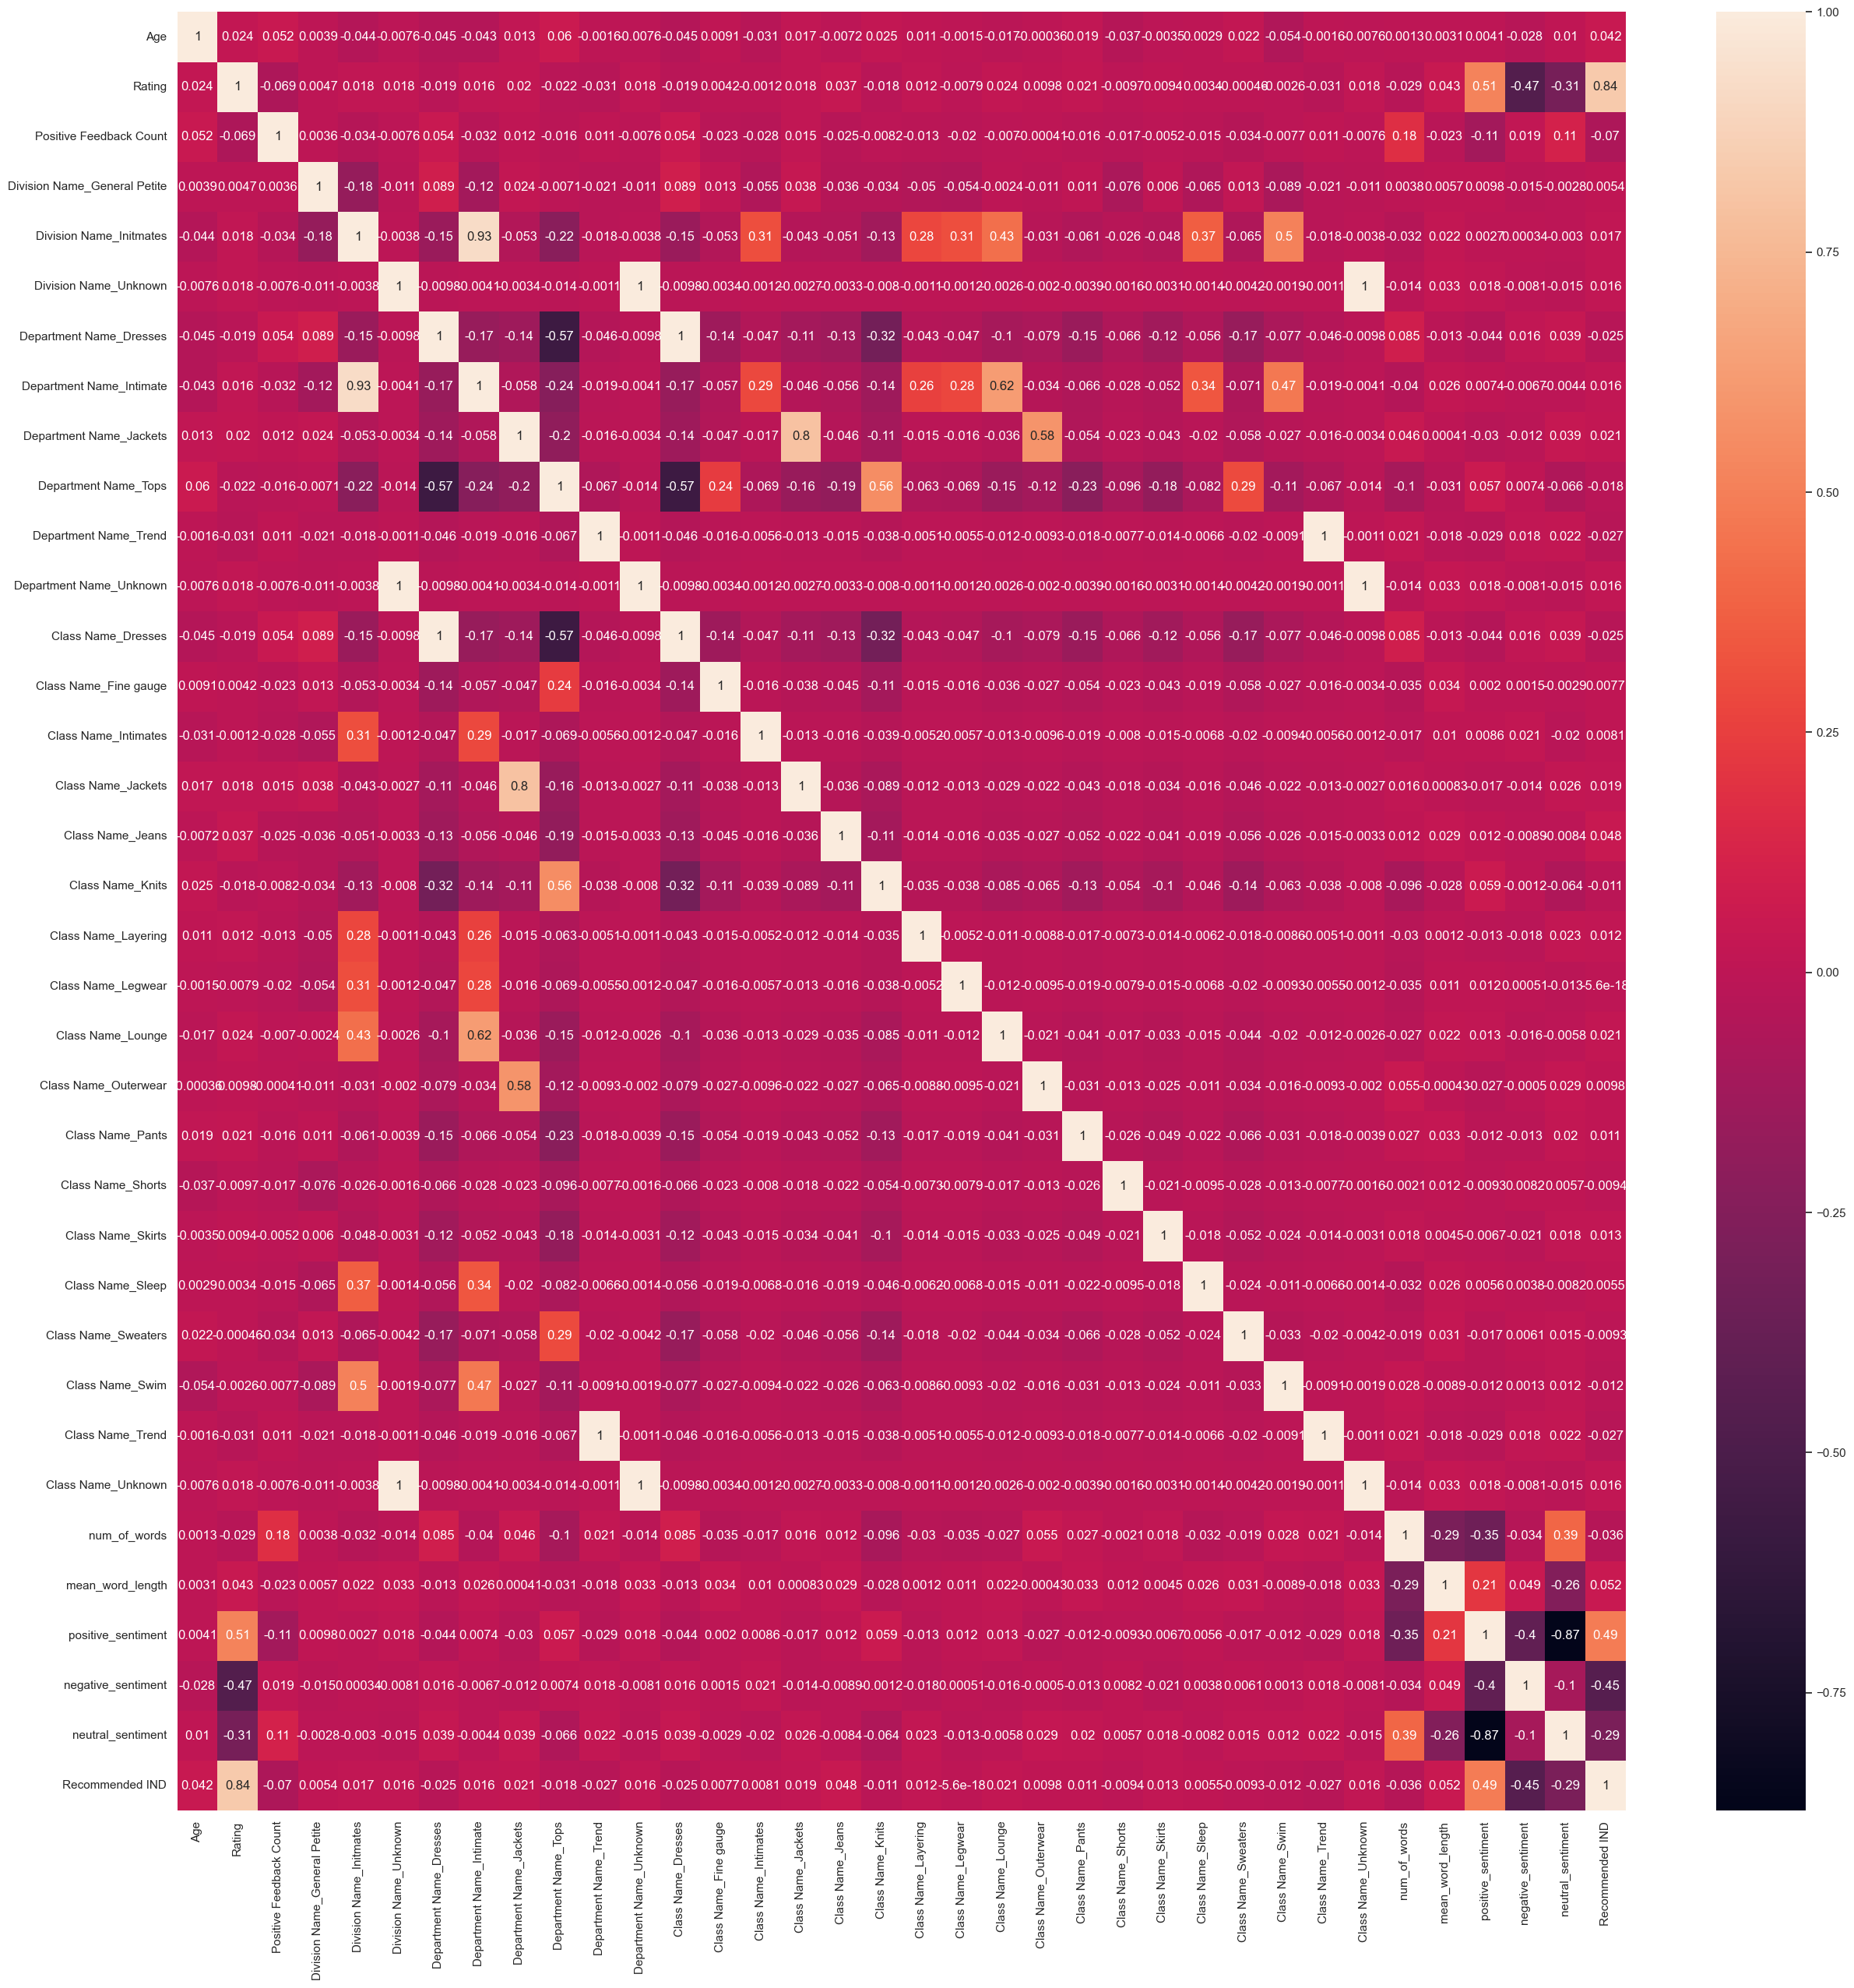

In [598]:
## Checking the correleation between the features and the target variable

plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

Comments about the correlation matrix:
* We see that the Rating and the sentiment have a high correlation with the target variable(Recommended IND).
* Categorical columns have low correlation with the rating. That's because we have used One Hot Encoding for them.
* We may need to drop some columns since they have low correlation with the rating. We will use *Feature Elimination* to decide which columns to drop.

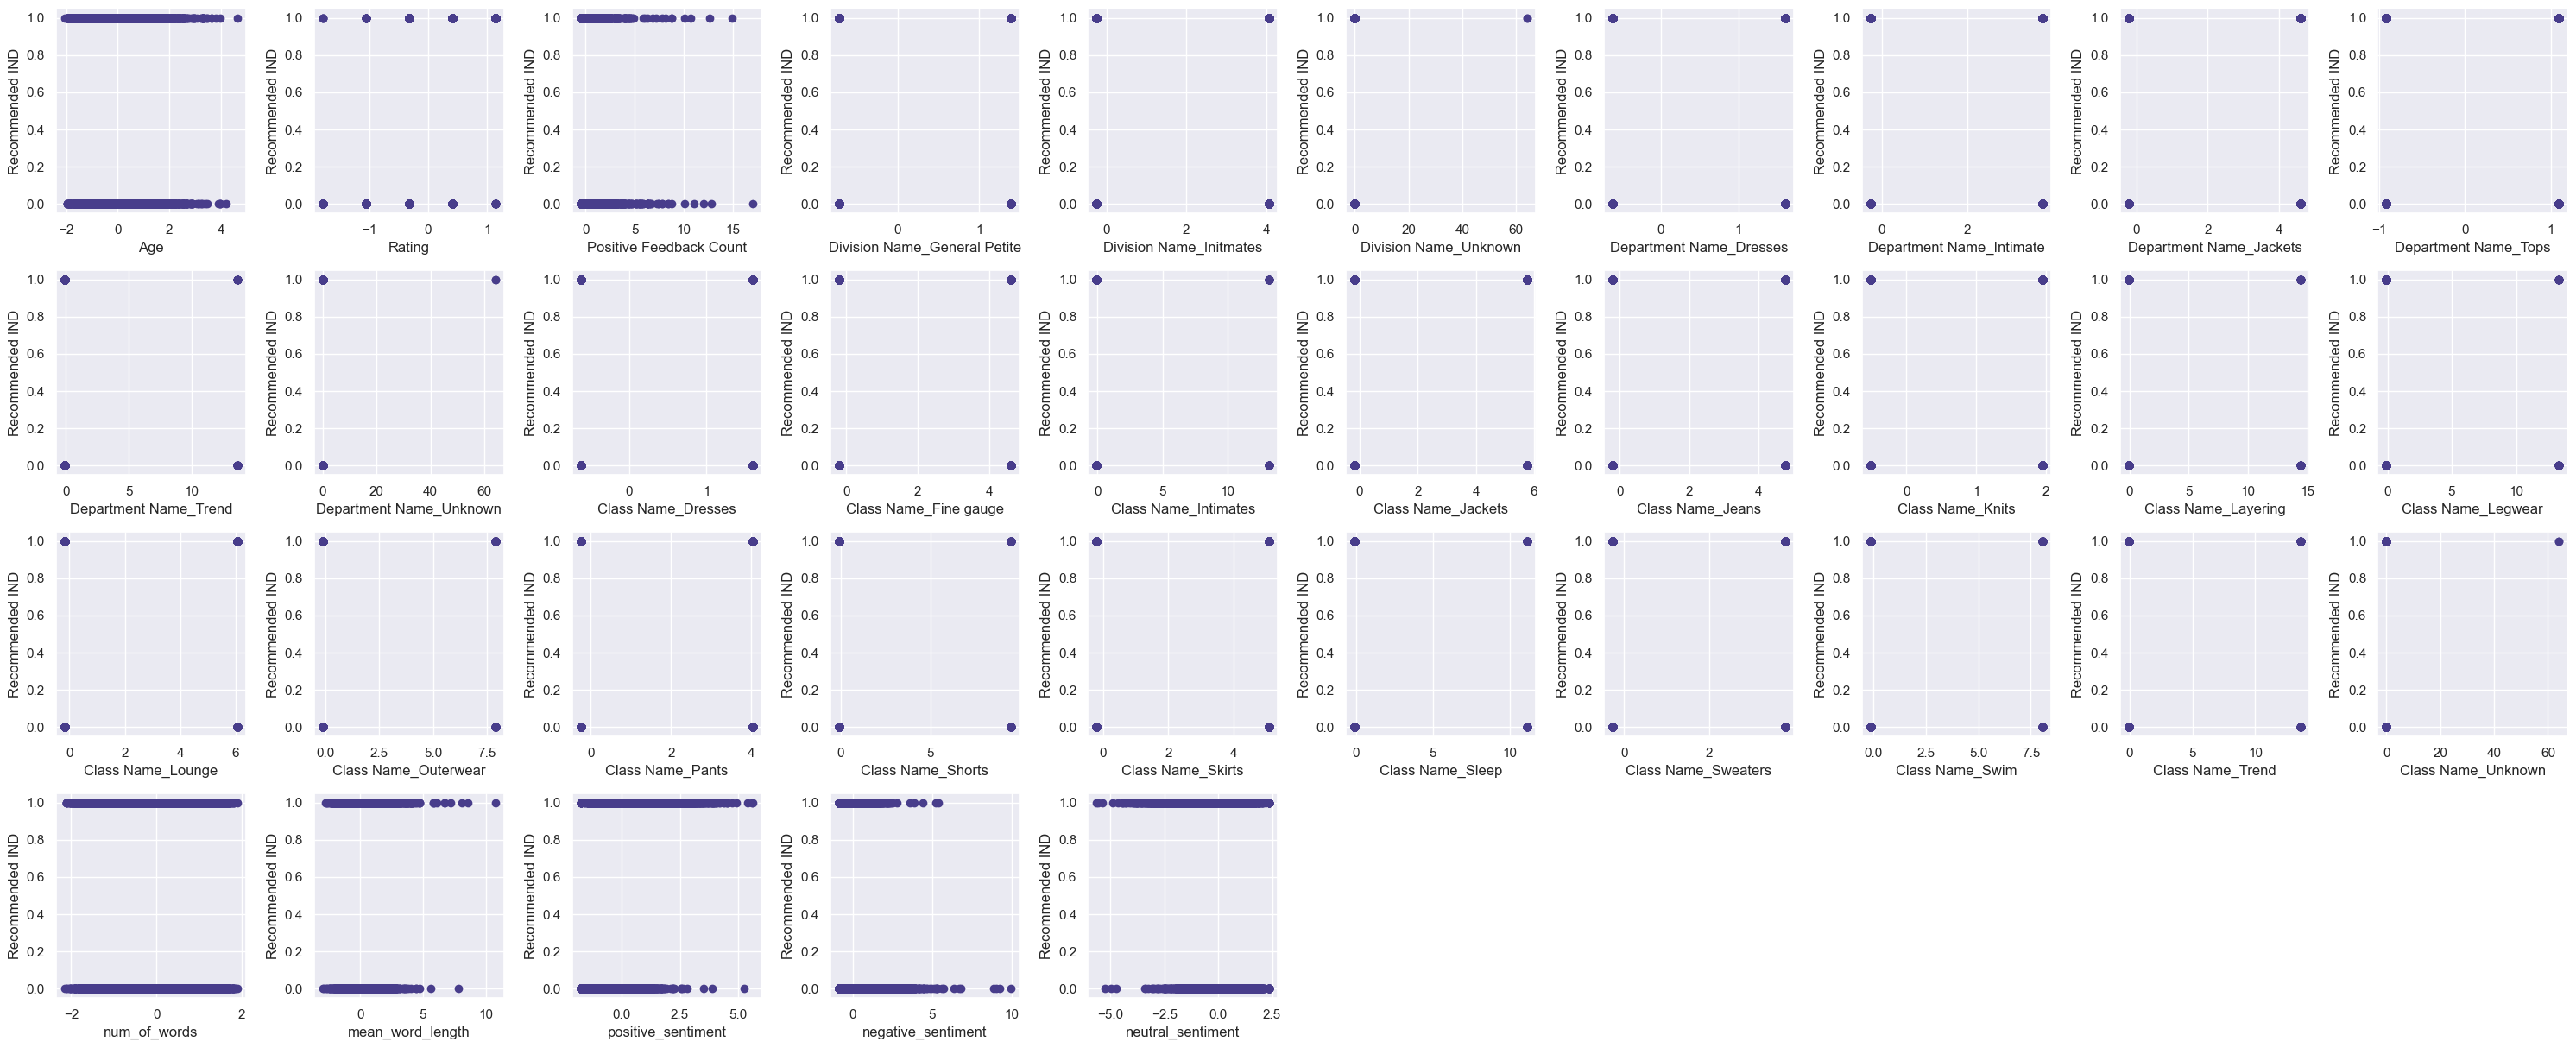

In [599]:
plt.figure(figsize=(30,30))
for i, col in enumerate(df.drop("Recommended IND", axis=1).columns):
    plt.subplot(10,10, i+1)
    plt.scatter(df[col], df['Recommended IND'], color='darkslateblue')
    plt.xlabel(col)
    plt.ylabel('Recommended IND')

plt.tight_layout()

* It is really hard to understand the plots with this tabular format. We will use seaborns' *Joint Plot* to visualize the data better.

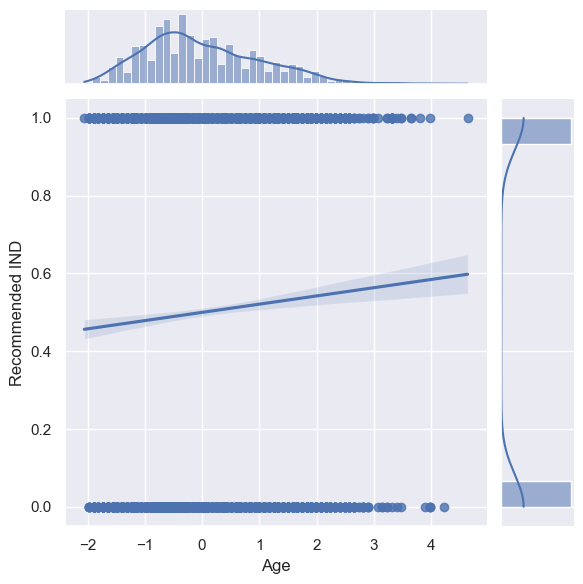

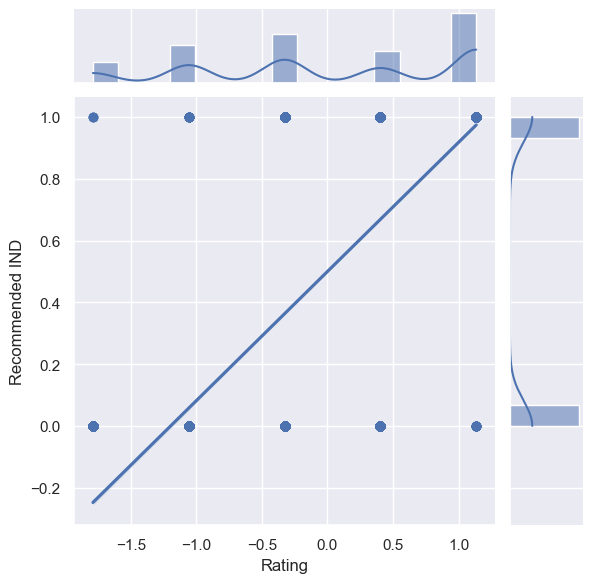

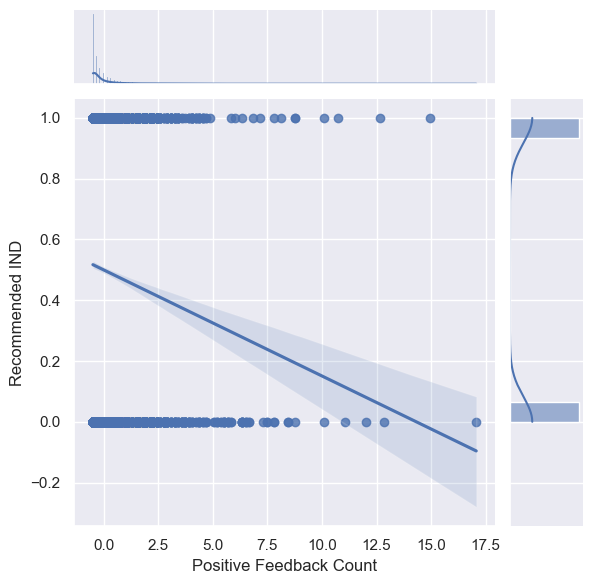

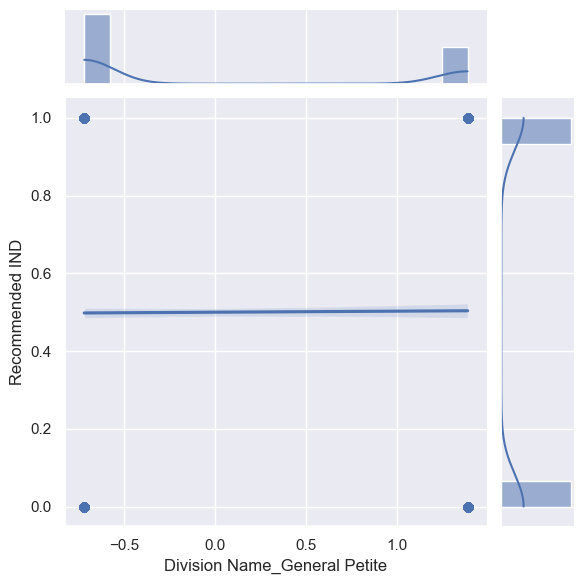

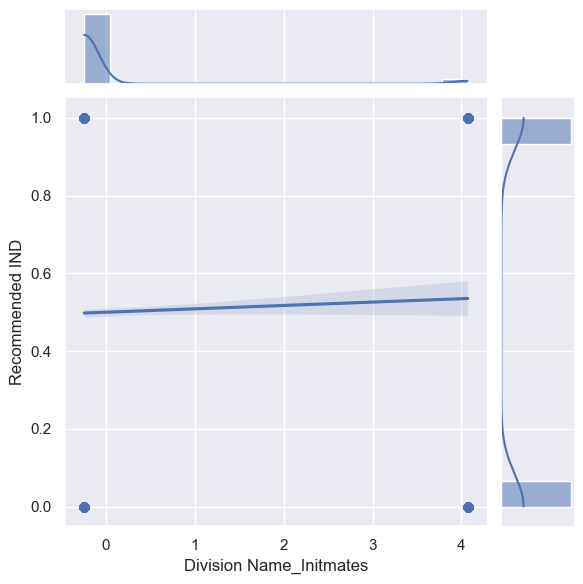

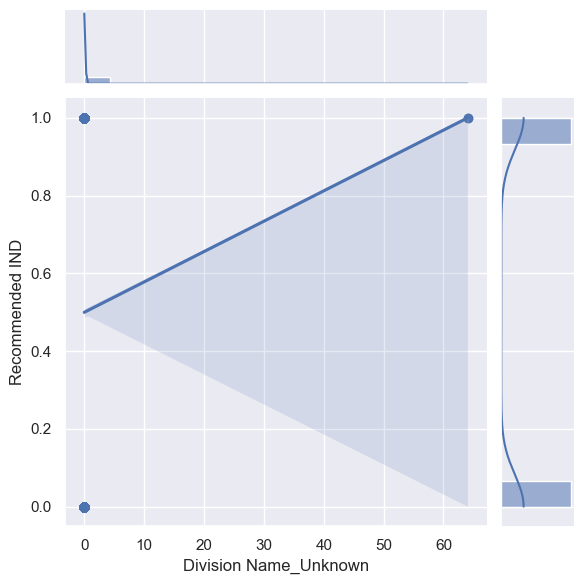

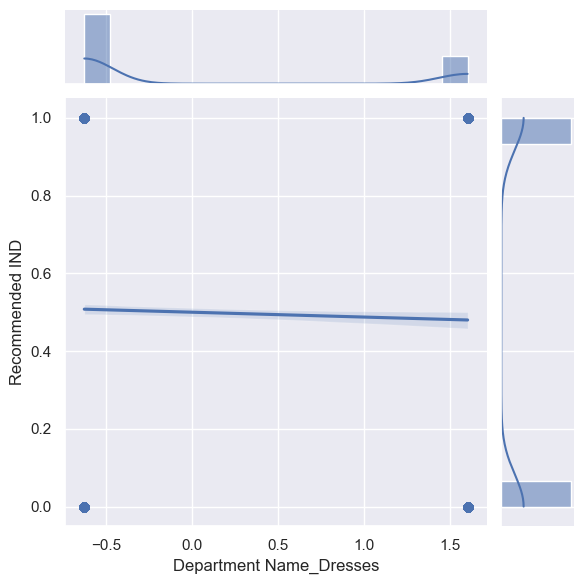

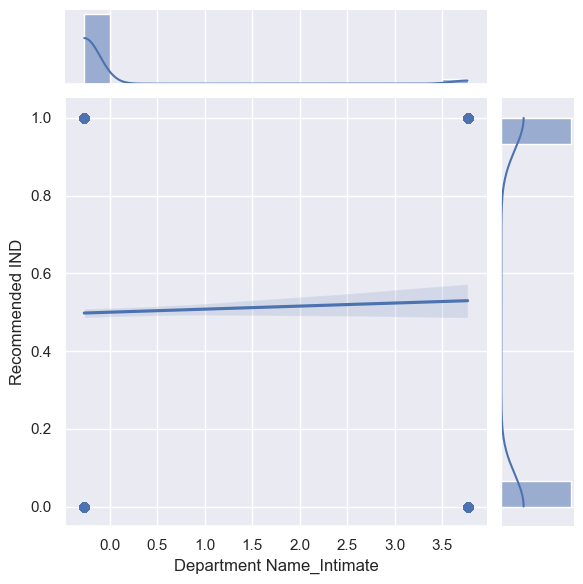

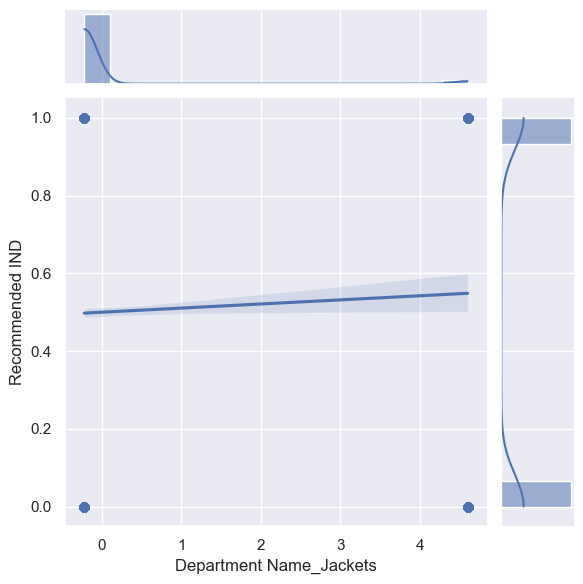

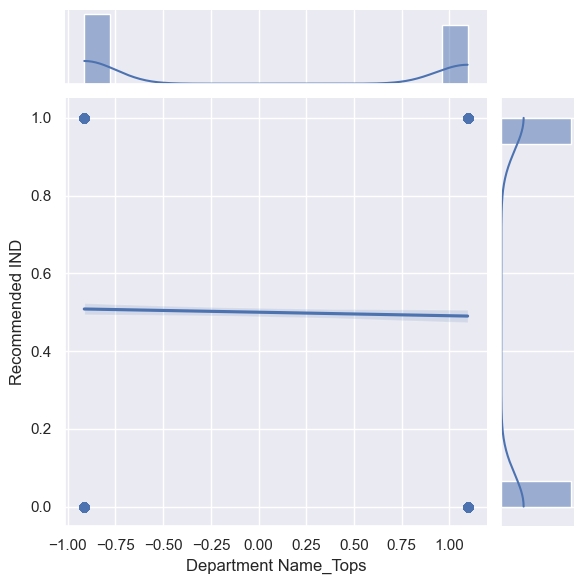

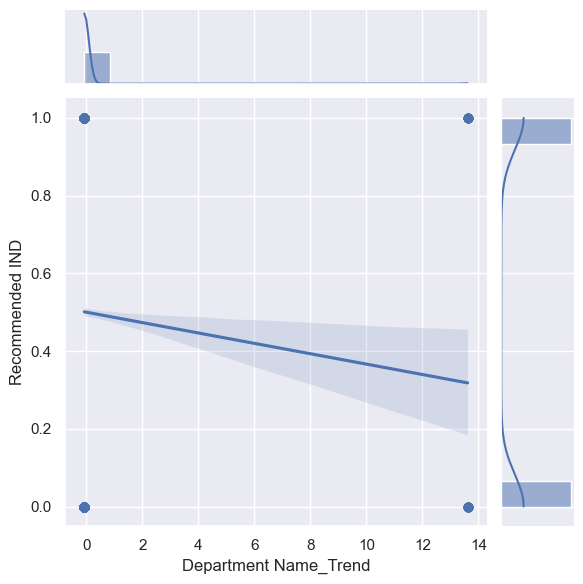

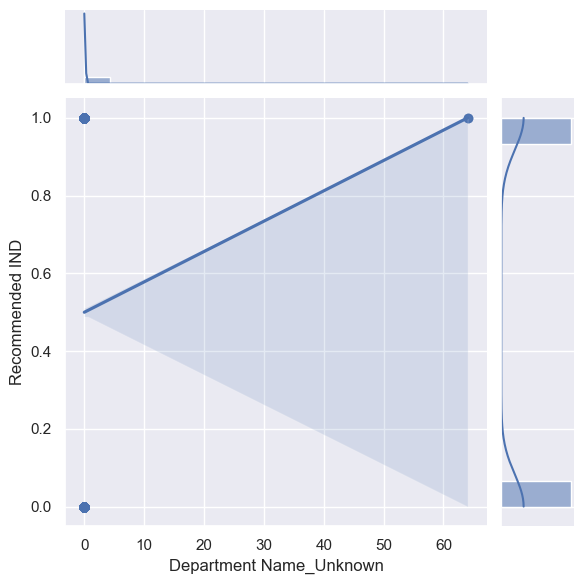

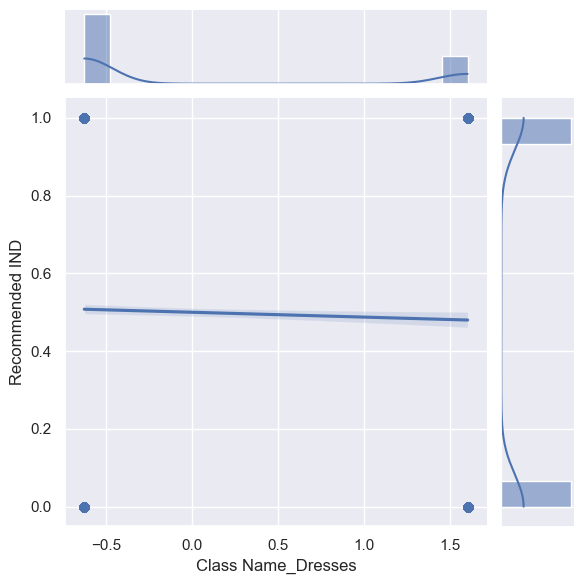

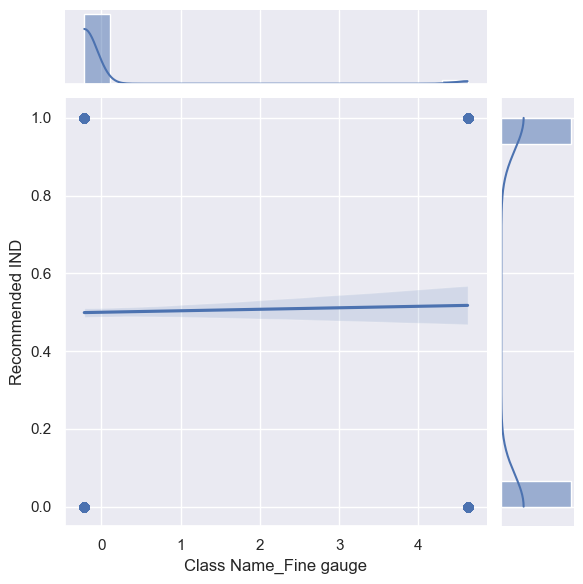

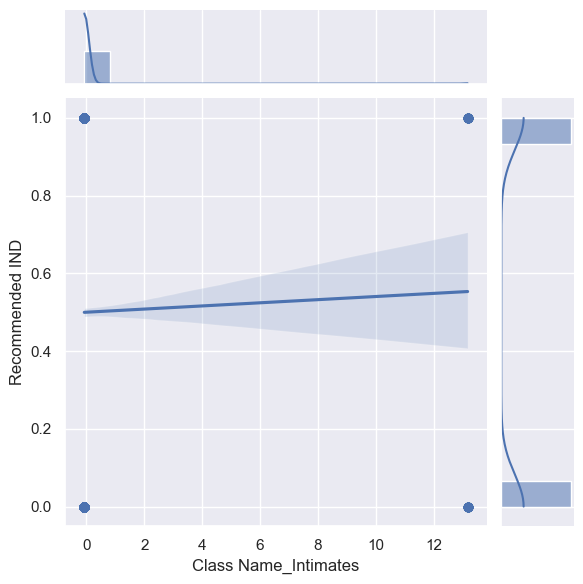

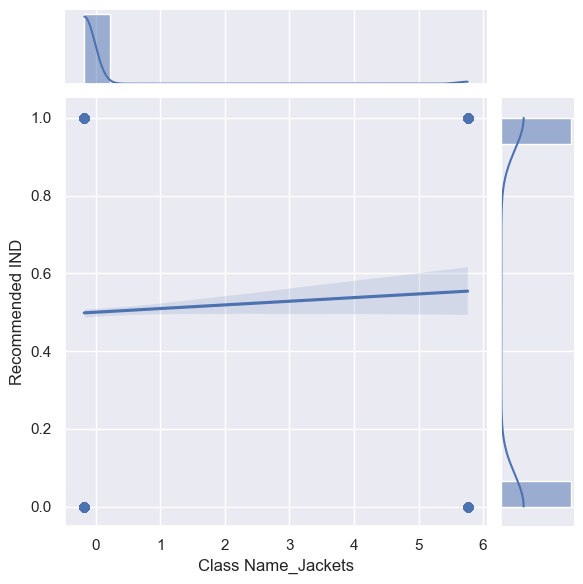

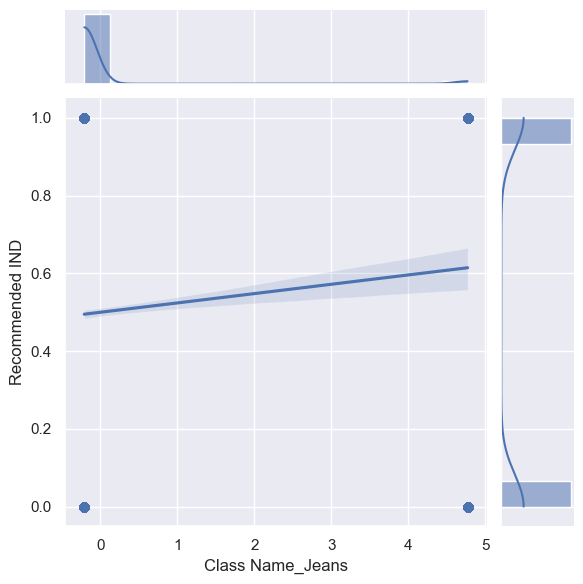

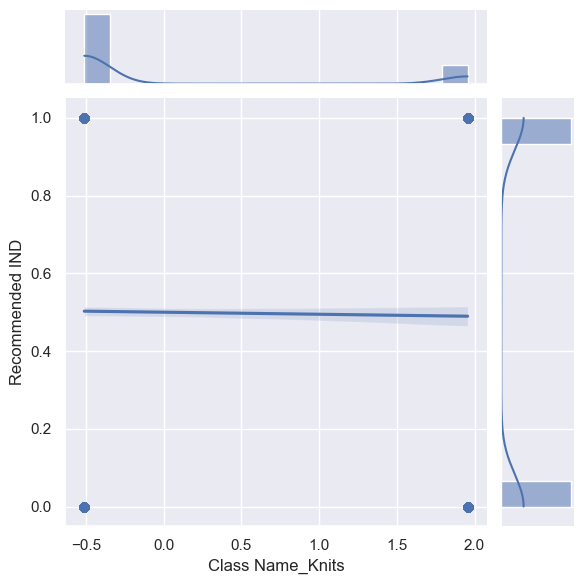

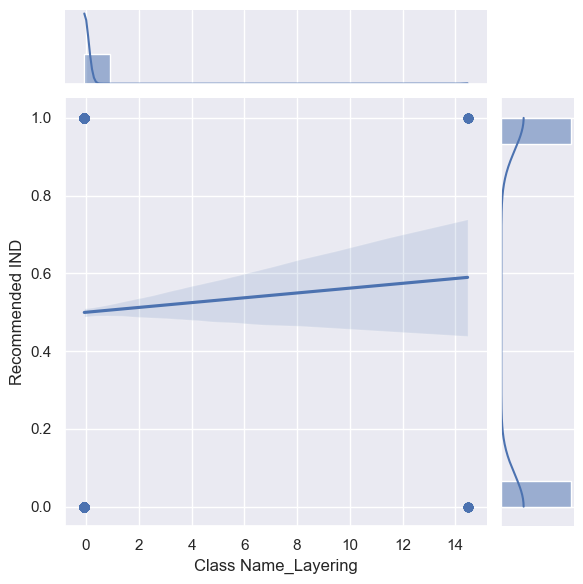

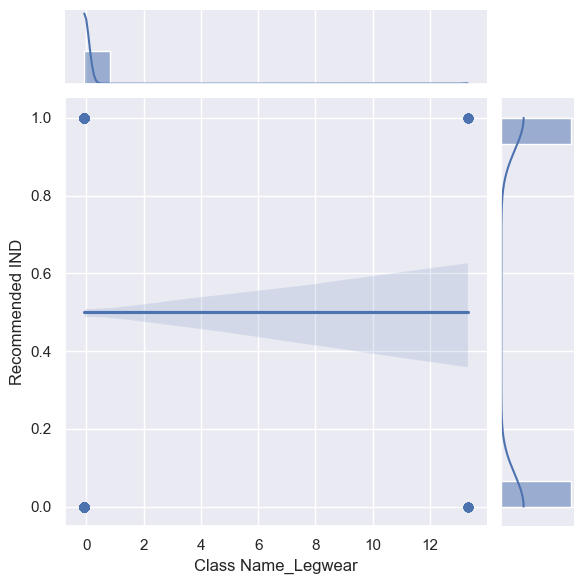

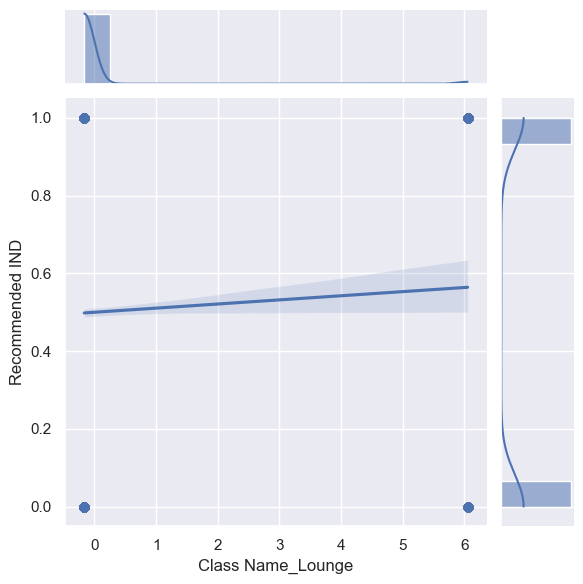

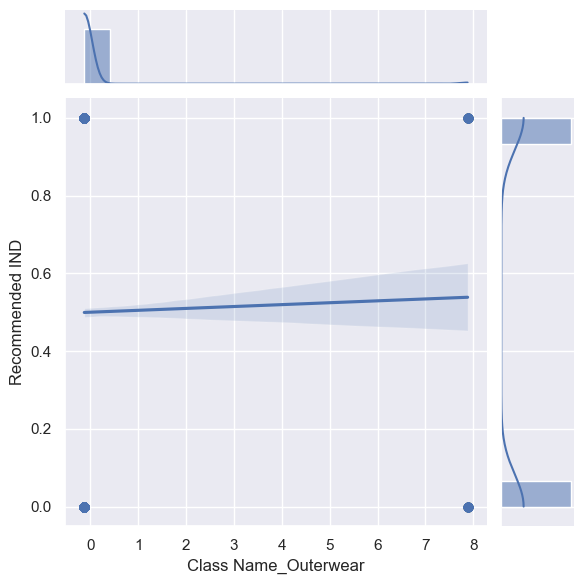

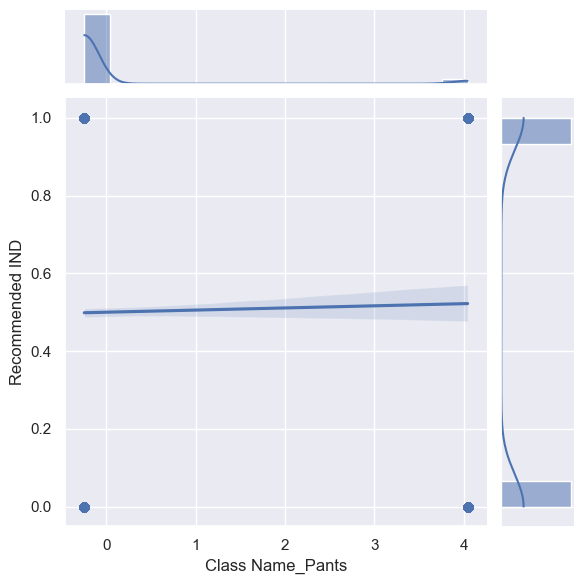

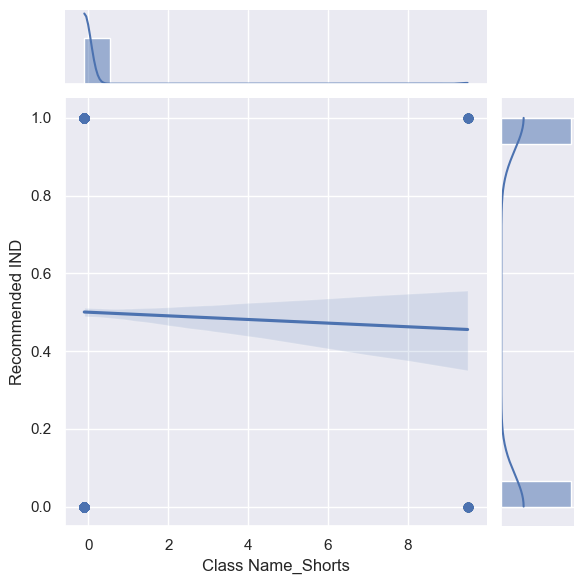

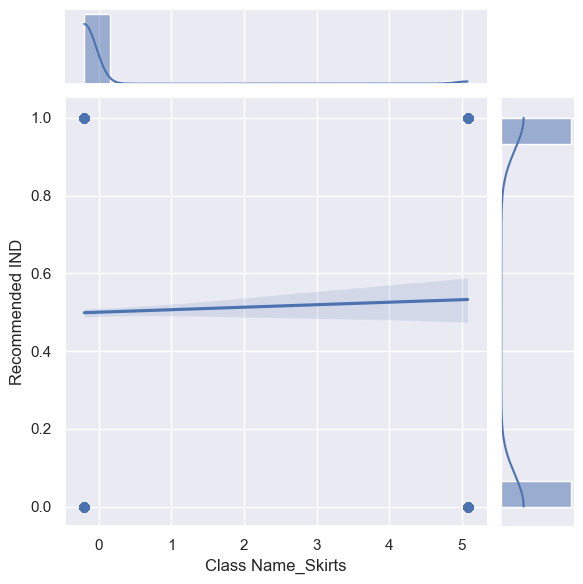

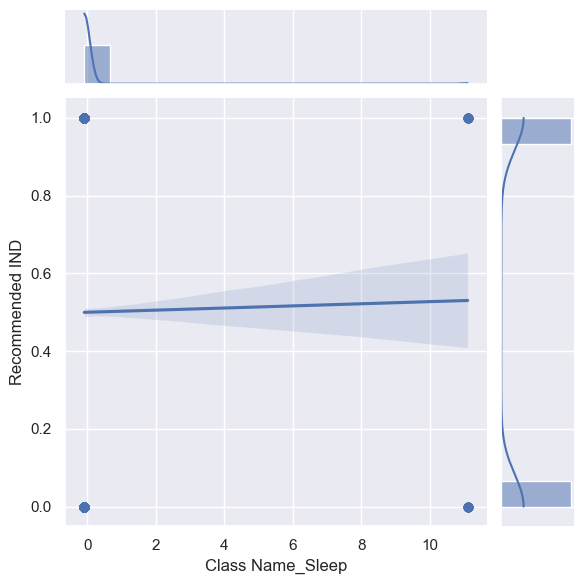

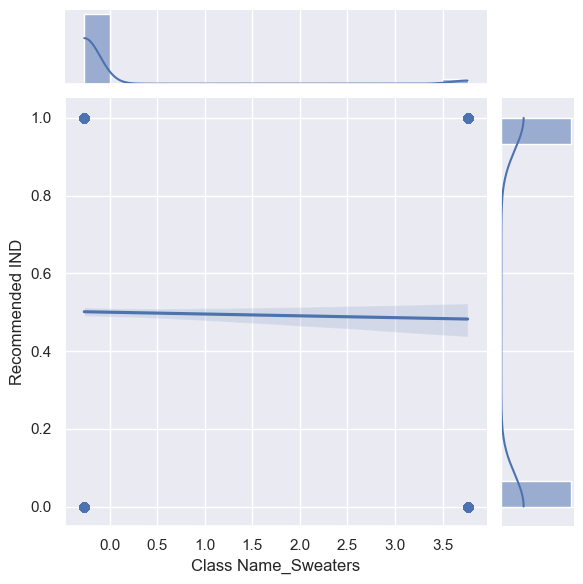

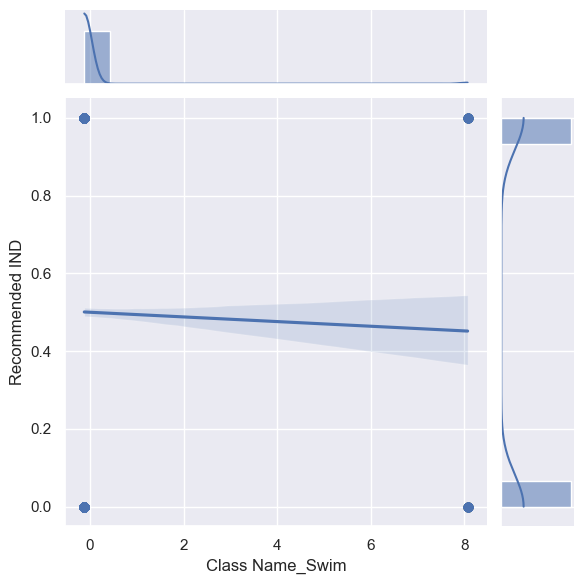

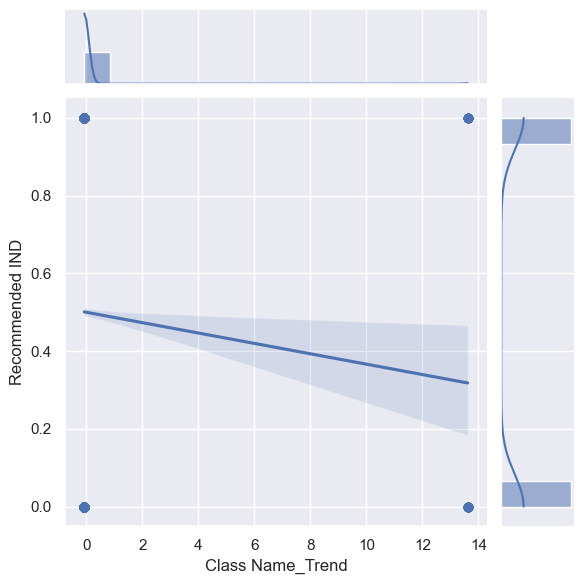

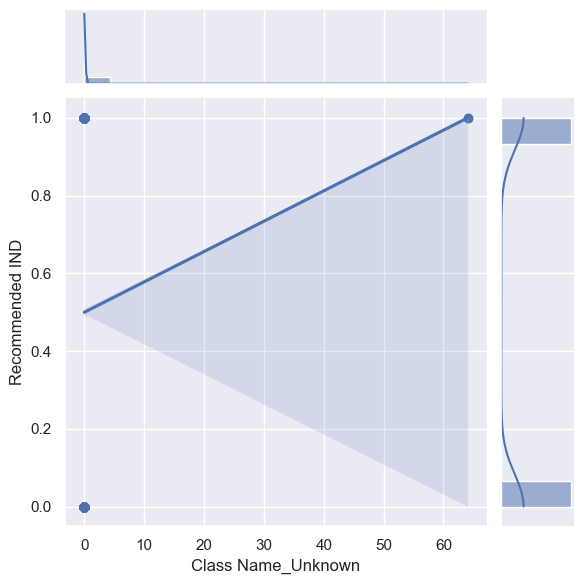

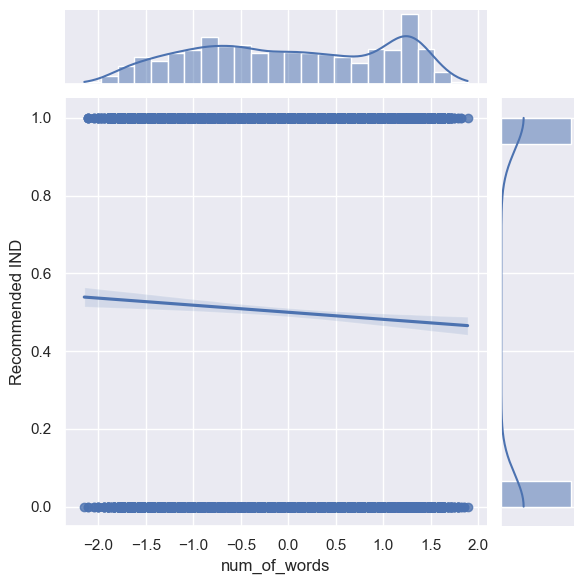

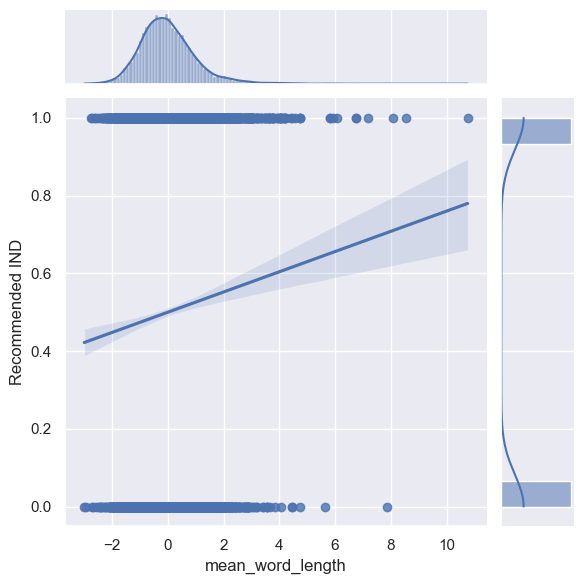

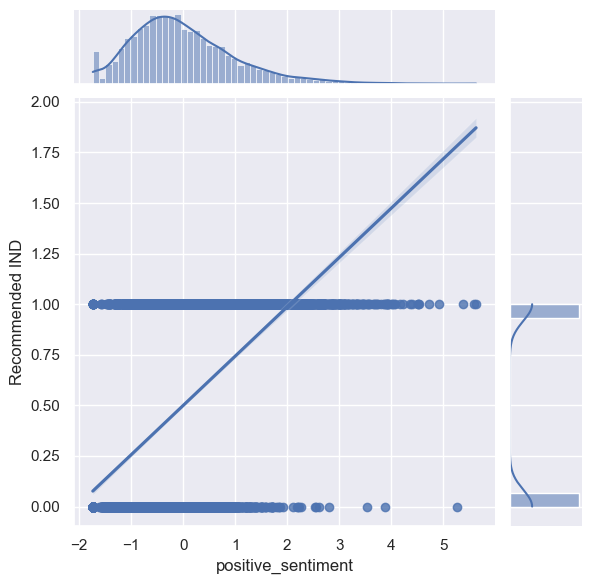

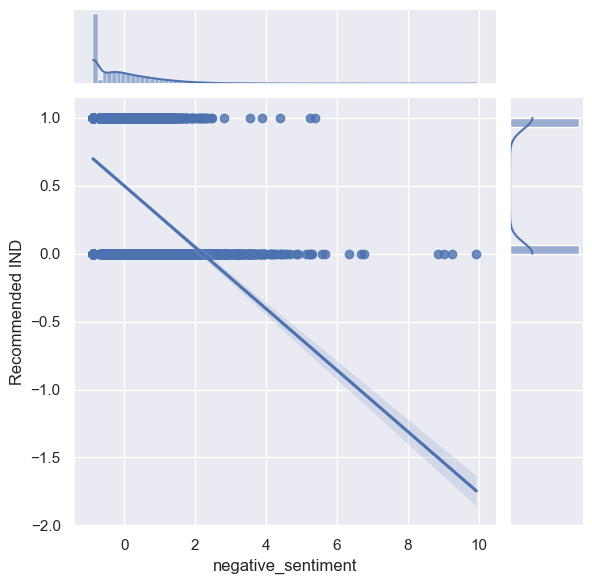

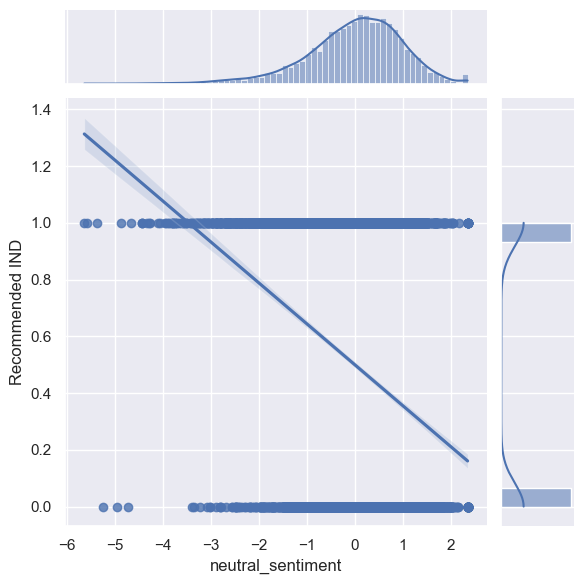

In [600]:
for ele in df.columns:
    if ele!="Recommended IND":
        sns.jointplot(x=ele,y="Recommended IND",data=df,kind="reg")
        plt.show()

* When checked, you can see that there are lots of redundant columns. We will use *Feature Elimination* to drop them.

* The reason that they are redundant is their correlation with the rating.
They have low correlation with the rating.
We can check it by looking at the regression plot of the rating and the column.

* Lets' check if we have any clusters in our data.


Since we have 5 classes, we will use PCA to reduce the dimensionality to 2.


We have scaled the data before applying PCA.

In [601]:
## PCA for dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df)

pca.explained_variance_ratio_

array([0.08752017, 0.08558681])

* Explained variance ratio is too low for the first 2 components. It will be hard to visualize the data.

<Axes: xlabel='PCA1', ylabel='PCA2'>

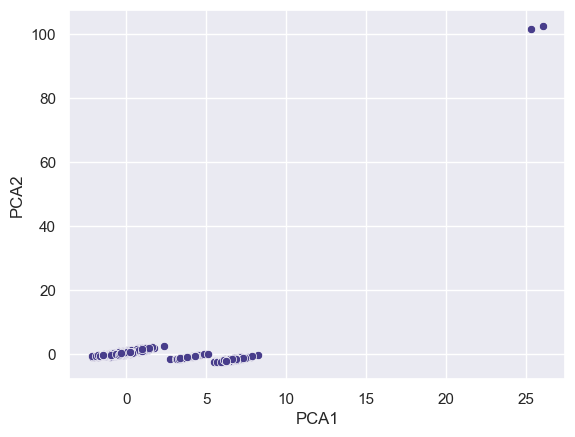

In [602]:
PCA_df = pd.DataFrame(pca.transform(df),columns=['PCA1','PCA2'])

sns.scatterplot(data=PCA_df,x='PCA1',y='PCA2',color='darkslateblue')

* Even if our PCA has explained a low percentage of our variance, we can cluster the data into 4 groups based on PCA.

* Let's try it with KMeans too.

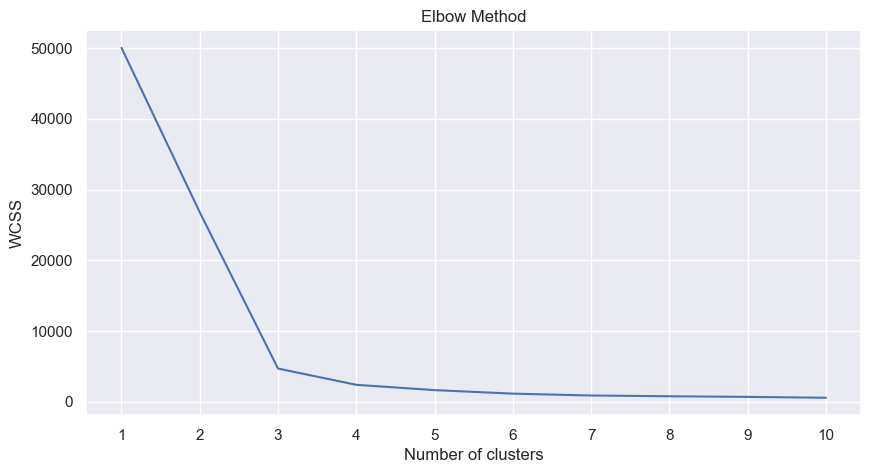

In [603]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init="auto",max_iter=300,random_state=0)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.xticks(range(1,11))
plt.ylabel("WCSS")
plt.show()

* From the elbow method we can see that the optimal number of clusters is 3.
* So we will use 3 clusters for our KMeans model.

<Axes: xlabel='PCA1', ylabel='PCA2'>

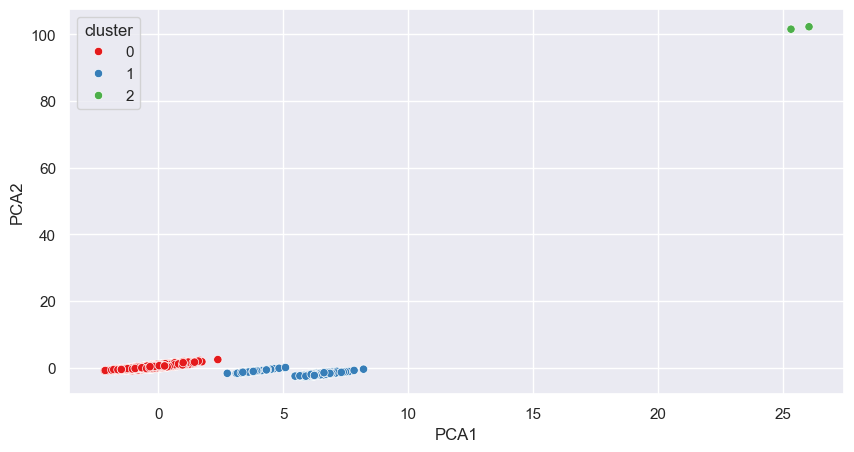

In [604]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init="auto",max_iter=300,random_state=0)
kmeans.fit(PCA_df)

PCA_df['cluster'] = kmeans.labels_

plt.figure(figsize=(10,5))

sns.scatterplot(data=PCA_df,x='PCA1',y='PCA2',hue='cluster',palette='Set1')

Lets' try with another clustering algorithm which is Agglomerative Clustering.

<Axes: xlabel='PCA1', ylabel='PCA2'>

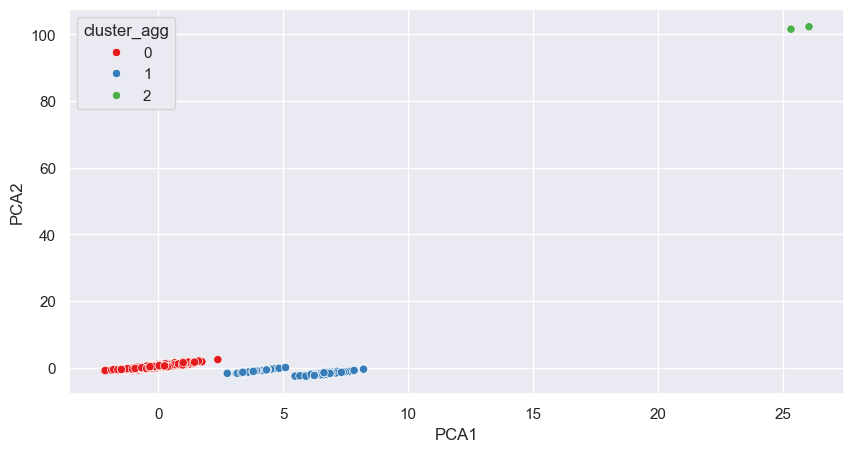

In [605]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
agg.fit(PCA_df)

PCA_df['cluster_agg'] = agg.labels_

plt.figure(figsize=(10,5))

sns.scatterplot(data=PCA_df,x='PCA1',y='PCA2',hue='cluster_agg',palette='Set1')


* We have used 3 clusters for this algorithm too.
* We can see that the clusters are not well separated. Our PCA has not done a good job or the data is not separable easily.


## Feature Elimination
* Feature Elimination is a method that removes n number of features that are not important.
* We will use it to lower the dimensionality of our data.

* We will check the correlation values and set a threshold to dropping.

### But, why?
* We have 30 features and as we have inspected before, some of them are redundant.
* Redundant features are not useful for our model. They may even cause overfitting.
* We need to drop them in order to increase the performance of our model.
* Also when we drop them we will have a lower dimensionality which means that our model will be faster and its' complexity will be lower. Checkout the curse of dimensionality and Bias-Variance tradeoff for more information.

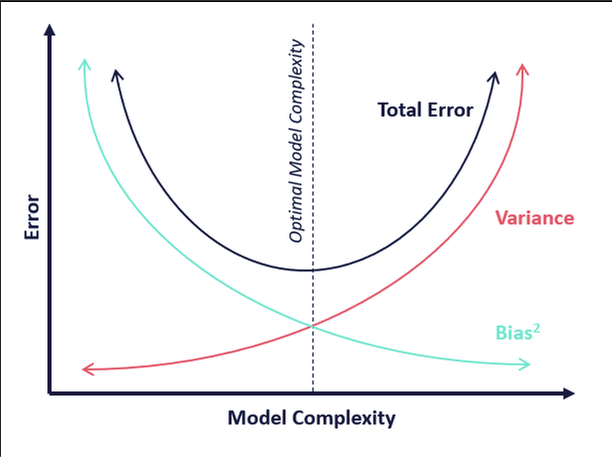
- Image source: https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/



In [606]:
# Checking the correlation between the features and the target variable.

corr = df.corr()
corr_target = abs(corr['Recommended IND'])

relevant_features = corr_target.sort_values(ascending=False)

relevant_features

Recommended IND                 1.000000e+00
Rating                          8.361500e-01
positive_sentiment              4.873129e-01
negative_sentiment              4.521176e-01
neutral_sentiment               2.883328e-01
Positive Feedback Count         6.982241e-02
mean_word_length                5.203258e-02
Class Name_Jeans                4.798320e-02
Age                             4.231442e-02
num_of_words                    3.635358e-02
Department Name_Trend           2.670557e-02
Class Name_Trend                2.670557e-02
Class Name_Dresses              2.496371e-02
Department Name_Dresses         2.496371e-02
Class Name_Lounge               2.122362e-02
Department Name_Jackets         2.114781e-02
Class Name_Jackets              1.880861e-02
Department Name_Tops            1.811867e-02
Division Name_Initmates         1.736302e-02
Department Name_Intimate        1.573193e-02
Department Name_Unknown         1.561738e-02
Division Name_Unknown           1.561738e-02
Class Name

When we check the correlation table we see that the most of the correlation values are below 0.020.
So we will set our threshold to 0.020 and try to keep our good predictors.

By the way, we need use at least 10 features in the context of this project and our selected threshold covers this constraint too. 

In [607]:
relevant_features = corr_target.sort_values(ascending=False).loc[corr_target.sort_values(ascending=False)>0.022].index.to_list()

In [608]:
print(relevant_features)
print(len(relevant_features))

['Recommended IND', 'Rating', 'positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'Positive Feedback Count', 'mean_word_length', 'Class Name_Jeans', 'Age', 'num_of_words', 'Department Name_Trend', 'Class Name_Trend', 'Class Name_Dresses', 'Department Name_Dresses']
14


In [609]:
df_fe = df[relevant_features]

In [610]:
df_fe.head()

,Recommended IND,Rating,positive_sentiment,negative_sentiment,neutral_sentiment,Positive Feedback Count,mean_word_length,Class Name_Jeans,Age,num_of_words,Department Name_Trend,Class Name_Trend,Class Name_Dresses,Department Name_Dresses
0,0,-0.327174,-0.986588,1.102205,0.484536,-0.327073,0.671063,-0.209547,-0.321932,1.117788,-0.07344,-0.07344,-0.624635,-0.624635
1,0,-1.057769,0.849847,1.036145,-1.463658,1.135927,0.132599,-0.209547,0.173872,0.274799,-0.07344,-0.07344,-0.624635,-0.624635
2,0,-0.327174,-0.760068,-0.516261,1.090056,1.461038,-1.462944,-0.209547,-0.321932,1.820278,-0.07344,-0.07344,-0.624635,-0.624635
3,0,-1.057769,-0.857148,-0.235506,1.054953,-0.164518,0.167709,-0.209547,2.900795,-0.322317,-0.07344,-0.07344,1.600934,1.600934
4,0,-0.327174,-0.541637,-0.334596,0.765357,-0.489629,-0.008516,-0.209547,0.587042,-0.849185,-0.07344,-0.07344,1.600934,1.600934


* Now we have selected our most important features. Our dimension has been reduced.

## Model Training

* We will use 3 different models to predict the rating of the reviews.
* We will use Naive Bayes, Logistic Regression and SVM.
* We will use 5-fold cross validation to train our models.

## Splitting the data into train,test and validation sets

Before splitting our data, we need to retransform our target values to their original form.
Because our model thinks that the target values are continuous, not discrete. Hence, we will retransform them to their original form.

We'll use the train set for training the model, validation set for tuning the hyperparameters and test set for testing the model.
* Our ratio is 60% train, 20% validation and 20% test.

In [611]:
# Retransform the target value to its original form
df_fe.loc[:, 'Recommended IND'] = df['Recommended IND'].values

In [612]:
df['Recommended IND'].unique()

array([0, 1])

In [613]:
from sklearn.model_selection import train_test_split

X = df_fe.drop('Recommended IND',axis=1)
y = df_fe['Recommended IND']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=12,stratify=y)

In [614]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=12,stratify=y_test)

In [615]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4921, 13), (1640, 13), (4921,), (1640,))

In [616]:
y_train.value_counts()

Recommended IND
0    2461
1    2460
Name: count, dtype: int64

* We can clearly see that we have solved the class imbalance problem.

We will use this code to fit our models.

In [617]:
def model_eval(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return model,y_pred

We will use this function to evaluate the performance of our models.

In [618]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score

def model_eval_metrics(model,y_test,y_pred):
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Precision Score : ",precision_score(y_test,y_pred))
    print("Recall Score : ",recall_score(y_test,y_pred))
    print("F1 Score : ",f1_score(y_test,y_pred))
    print("ROC AUC Score : ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
    print("Classification Report : \n",classification_report(y_test,y_pred))

We will use this function to plot the roc curve of our models.

In [619]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='darkslateblue', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='darkslateblue', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Area under the curve: %.2f" % (100*roc_auc_score(y_test, y_pred)))
    plt.legend()
    plt.show()


We will use this function to plot the PR(Presicion - Recall) curve of our models.

In [620]:
def plot_precision_recall_curve(y_test,y_pred):
    from sklearn.metrics import precision_recall_curve
    precision,recall,thresholds = precision_recall_curve(y_test,y_pred)

    plt.figure(figsize=(10,5))
    plt.plot(recall,precision,color='darkslateblue',label='Precision-Recall curve')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Presicion-Recall Curve")
    plt.legend()
    plt.show()

### Lets' take a look at the initial results.

* We are too excited to see the results. Let's check them.
* Since we have not implemented any hyperparameter tuning, we may not get the best results.
* We'll make hyperparameter tuning and 5-Fold Cross Validation to get the best results.

In [621]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


log_reg , y_pred = model_eval(LogisticRegression(),X_train,X_test,y_train,y_test)

print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))
print("Classification report : \n",classification_report(y_test,y_pred))

Accuracy score :  0.9426829268292682
Confusion matrix : 
 [[777  43]
 [ 51 769]]
Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       820
           1       0.95      0.94      0.94       820

    accuracy                           0.94      1640
   macro avg       0.94      0.94      0.94      1640
weighted avg       0.94      0.94      0.94      1640



In [622]:
from sklearn.svm import SVC

svc , y_pred = model_eval(SVC(),X_train,X_test,y_train,y_test)

print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))
print("Classification report : \n",classification_report(y_test,y_pred))

Accuracy score :  0.9414634146341463
Confusion matrix : 
 [[781  39]
 [ 57 763]]
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       820
           1       0.95      0.93      0.94       820

    accuracy                           0.94      1640
   macro avg       0.94      0.94      0.94      1640
weighted avg       0.94      0.94      0.94      1640



In [623]:
from sklearn.naive_bayes import GaussianNB

nb , y_pred = model_eval(GaussianNB(),X_train,X_test,y_train,y_test)

print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))
print("Classification report : \n",classification_report(y_test,y_pred))

Accuracy score :  0.9121951219512195
Confusion matrix : 
 [[743  77]
 [ 67 753]]
Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       820
           1       0.91      0.92      0.91       820

    accuracy                           0.91      1640
   macro avg       0.91      0.91      0.91      1640
weighted avg       0.91      0.91      0.91      1640



These scores are really good for the first try. We will try to improve and make them more realistic by CV and KFold.

## Hyperparameter Tuning and 5-Fold Cross Validation

* We will use GridSearchCV to find the best parameters for our models.
* We will use 5-Fold Cross Validation to get the best results.

* We will use the following parameters for our models:
    1. Naive Bayes: No hyperparameters.
    2. Logistic Regression: C, penalty, solver, max_iter.
    3. SVM: C, kernel, gamma.

- We need to select a scoring method for our model. Which one should we use?
1. Accuracy: It may be a good metric for our model since our dataset is balanced.
2. F1: It basically computes the harmonic mean of the precision and recall.
    It may be a good metric for our model since it both considers the false positives and false negatives.
3. ROC AUC: It is similar to f1 score but it uses the ROC curve.
    It considers FPR instead of presicion.

* We will choose ROC AUC since it is the most balanced metric for our model. It uses TP,TN,FP,FN.
* We'll also compute the accuracy and f1 scores for our model.

### Naive Bayes
* Let's start with the naive one :).
* We'll only use 5-Fold Cross Validation for this model since it doesn't require any parameters to optimize.

In [624]:
from sklearn.model_selection import KFold,cross_val_score

kf = KFold(n_splits=5,shuffle=True,random_state=42)

nb , y_pred_nb = model_eval(GaussianNB(),X_train,X_val,y_train,y_val)

roc_auc_nb=cross_val_score(nb,X_train,y_train,cv=kf,scoring='roc_auc').mean()
accuracy_nb=cross_val_score(nb,X_train,y_train,cv=kf,scoring='accuracy').mean()
f1_nb=cross_val_score(nb,X_train,y_train,cv=kf,scoring='f1').mean()

print("Evaluation Metrics with KFold Cross Validation")

print("ROC_AUC score : ",roc_auc_nb)
print("Accuracy score : ",accuracy_nb)
print("F1 score : ",f1_nb)

Evaluation Metrics with KFold Cross Validation
ROC_AUC score :  0.966949744741636
Accuracy score :  0.9219664892080394
F1 score :  0.9217172409370396


### Logistic Regression

* We will use GridSearchCV to find the best parameters for our model.
* Our parameters are: C, penalty, solver, max_iter.

In [625]:
warnings.filterwarnings("ignore") ## Ignoring the warnings

In [626]:
from sklearn.model_selection import GridSearchCV

params = {'C':[10**ele for ele in range(-3,10)],'penalty':['l1','l2','elasticnet'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_log_reg = GridSearchCV(LogisticRegression(),params,cv=kf,scoring='roc_auc')

grid_log_reg.fit(X_train,y_train)

grid_log_reg.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [627]:
log_reg,y_pred_log_reg = model_eval(LogisticRegression(C=grid_log_reg.best_params_['C'],penalty=grid_log_reg.best_params_['penalty'],solver=grid_log_reg.best_params_['solver']),X_train,X_val,y_train,y_val)

roc_auc_log_reg = cross_val_score(log_reg,X_train,y_train,cv=kf,scoring='roc_auc').mean()
accuracy_log_reg = cross_val_score(log_reg,X_train,y_train,cv=kf,scoring='accuracy').mean()
f1_log_reg = cross_val_score(log_reg,X_train,y_train,cv=kf,scoring='f1').mean()

print("ROC_AUC score CV: ",roc_auc_log_reg)
print("Accuracy score CV: ",accuracy_log_reg)
print("F1 score CV: ",f1_log_reg)

print("\nEvaluation Metrics with Validation Set\n")
model_eval_metrics(log_reg,y_val,y_pred_log_reg)

ROC_AUC score CV:  0.9788150503397077
Accuracy score CV:  0.9402562832734926
F1 score CV:  0.9393000824037762

Evaluation Metrics with Validation Set

Accuracy Score :  0.9421084704448507
Precision Score :  0.9526184538653366
Recall Score :  0.9305724725943971
F1 Score :  0.9414664202094887
ROC AUC Score :  0.9421155045898815
Confusion Matrix : 
 [[782  38]
 [ 57 764]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       820
           1       0.95      0.93      0.94       821

    accuracy                           0.94      1641
   macro avg       0.94      0.94      0.94      1641
weighted avg       0.94      0.94      0.94      1641



### SVM

* We will use GridSearchCV to find the best parameters for our model.
* Our parameters are: C, gamma.
* We will use 5-Fold Cross Validation to get the most realistic results.

In [628]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.001,0.01,0.1,1,10,100,1000],'gamma':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
grid_svc = GridSearchCV(SVC(),params,scoring='roc_auc',cv=kf)

grid_svc.fit(X_train,y_train)

grid_svc.best_params_

{'C': 10, 'gamma': 0.001}

In [629]:
svc , y_pred_svc = model_eval(SVC(C=grid_svc.best_params_['C'],gamma=grid_svc.best_params_['gamma']),X_train,X_val,y_train,y_val)

roc_auc_svc = cross_val_score(svc,X_train,y_train,cv=kf,scoring='roc_auc').mean()
accuracy_svc = cross_val_score(svc,X_train,y_train,cv=kf,scoring='accuracy').mean()
f1_svc = cross_val_score(svc,X_train,y_train,cv=kf,scoring='f1').mean()

print("ROC_AUC score CV: ",roc_auc_svc)
print("Accuracy score CV: ",accuracy_svc)
print("F1 score CV: ",f1_svc)

print("\nEvaluation Metrics with Validation Set\n")
model_eval_metrics(svc,y_val,y_pred_svc)

ROC_AUC score CV:  0.9776133241540199
Accuracy score CV:  0.941069497750815
F1 score CV:  0.9401744611915847

Evaluation Metrics with Validation Set

Accuracy Score :  0.9439366240097502
Precision Score :  0.9527950310559006
Recall Score :  0.9342265529841657
F1 Score :  0.9434194341943418
ROC AUC Score :  0.9439425447847658
Confusion Matrix : 
 [[782  38]
 [ 54 767]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       820
           1       0.95      0.93      0.94       821

    accuracy                           0.94      1641
   macro avg       0.94      0.94      0.94      1641
weighted avg       0.94      0.94      0.94      1641



### Results of the Hyperparameter Tuning and 5-Fold Cross Validation
* We have used 5-Fold Cross Validation to get the best results.
* We have used GridSearchCV to find the best parameters for our models.
* Our scoring method is selected as **ROC AUC**.
* We have used 3 different models to predict the rating of the reviews.(SVM, Logistic Regression, Naive Bayes)

1. Among these 3 models, Logistic Regression has the best ROC AUC score.
2. SVM was the second best model. The problem with SVM is that it takes **too much time** to train and more complex than Logistic Regression.
3. Naive Bayes was the worst model. It is not a surprise since it is the simplest model among these 3 models.

- When we check the ROC AUC scores, we can see that the scores of Logistic Regression and SVM are really close to each other.

Note: Even though Logistic Regression has the best ROC AUC score, we can still prefer Naive Bayes.
Because it is the simplest model and it has a good ROC AUC score.
It takes literally no time to train and it is easy to implement.

Time to train (sorted ascending):
1. Naive Bayes
2. Logistic Regression
3. SVM

Metrics (sorted descending):
1. Logistic Regression
2. SVM
3. Naive Bayes

### Personal Thoughts and Comments:
* At first, we thought that Naive Bayes would be the best model since it is a classification problem and it is a simple model.
* But we were wrong. Logistic Regression was the best model.
* As we've mentioned before, we think that the reason behind this is the nature of the dataset. If we were to use this model on a limited computational power, we would choose Naive Bayes over Logistic Regression.
* There exist a slight difference between Logistic Regression and SVM. Since it costs too much time to train SVM, we have choosen Logistic Regression over SVM.

### Chosen Model: Logistic Regression
* We will choose **Logistic Regression** as our final model since it has the **best ROC AUC score** and it is **not too complex to train and run**.

# Evaluation of the Classification

* Now we have chosen our model as Logistic Regression.
* Let's evaluate the performance of our model!

Accuracy Score :  0.9426829268292682
Precision Score :  0.9470443349753694
Recall Score :  0.9378048780487804
F1 Score :  0.9424019607843137
ROC AUC Score :  0.9426829268292682
Confusion Matrix : 
 [[777  43]
 [ 51 769]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       820
           1       0.95      0.94      0.94       820

    accuracy                           0.94      1640
   macro avg       0.94      0.94      0.94      1640
weighted avg       0.94      0.94      0.94      1640



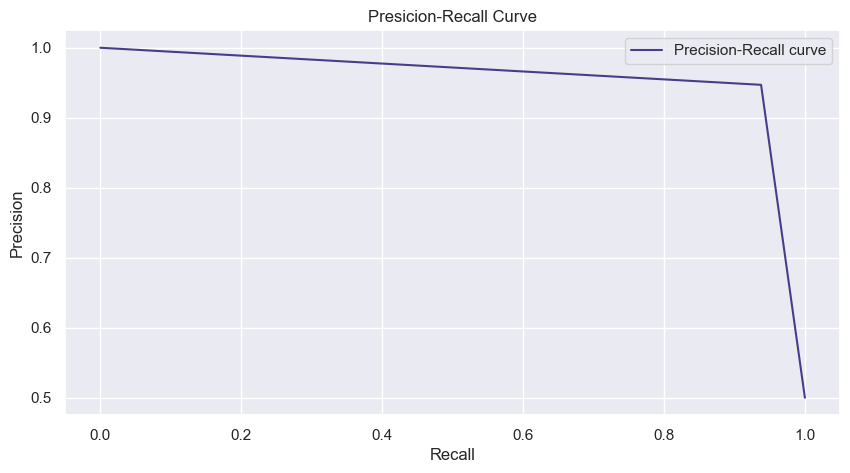

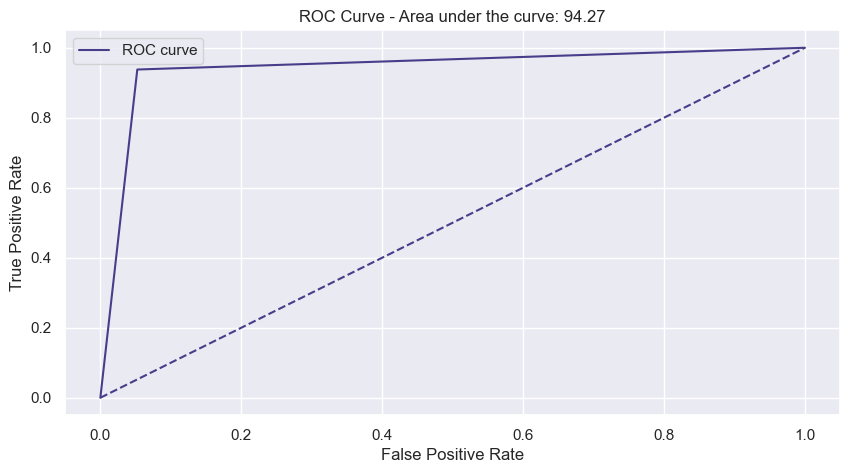

In [630]:
log_reg , y_pred_log_reg = model_eval(LogisticRegression(C=grid_log_reg.best_params_['C'],penalty=grid_log_reg.best_params_['penalty'],solver=grid_log_reg.best_params_['solver']),X_train,X_test,y_train,y_test)

model_eval_metrics(log_reg,y_test,y_pred_log_reg)
plot_precision_recall_curve(y_test,y_pred_log_reg)
plot_roc_curve(y_test,y_pred_log_reg)

### Steps of the Model Prediction and Evaluation
* We have chosen Logistic Regression as our final model.
* We have evaluated the performance of our model.
* We have plotted the ROC and PR curves of our model.
* We have plotted the confusion matrix of our model.
* We have plotted the classification report of our model.

### Final Metrics:
* We have achieved a **ROC AUC score of 0.94**.
* We have achieved a **F1 score of 0.94**.
* We have achieved a **Accuracy score of 0.94**.

### Comments:
* Our model is **not overfitting** since the scores of the train and test sets are close to each other.
* Our model is **not underfitting** since the scores of the train and test sets are high.
* Our model is **not biased** since we have solved the class imbalance problem.
* Our model is **not complex** since it is a simple model.
* Our model is **not slow** since it takes a reasonable amount of time to train and run.

* The ROC curve is really close to the top left corner. This means that our model is successful.
* The PR curve is really close to the top right corner. That is another positive indicator for us too.
* The confusion matrix is really close to the diagonal. This means that our model is successful.(TP and TN are **high**, FP and FN are **low**)

## Notes:
* It's a really good score for a classification problem. We can say that our model is successful.
* We're happy with the results since all the work we've done works fine :).

1. Also we have learned lots of things from this project. We have learned how to extract meaning from data and how to implement a classification model.
2. During data mining parts, it was fun to read some of the reviews. 

Some of them were really funny and some of them really helped us what we are dealing with :).

3. We have learned how to use GridSearchCV and 5-Fold Cross Validation to get the best results.
4. We have learned why do we use PCA and got hands on experience.
5. We have learned how to use seaborn and matplotlib to visualize the data.
6. We have learned how to use nltk library to extract meaning from the text.



Thank you for reading our project. We hope you enjoyed it as much as we did :).
We have learned a lot from this project and we hope you did too.

We've added some of the reviews that we liked below. Enjoy :).

## Some of the inferences we've made from the reviews:
* The customers are **generally satisfied** with the products.
* If a customer is not satisfied with the product, she is *usually* not satisfied with the **quality** of the product.
* Most of the customers write comments based on the clothes' **size** and how well does it fit on them.

### One problem that we've identified:
There are lots of customers who pick the wrong size and write a bad review about the product.

This is because online shopping is not easy and it is hard to pick the right size.

There exist a lot of reviews like "I picked the wrong size, it is too big/small for me". We identify this as a problem.

This problem is really important for the seller and online shopping sites.
In case of a bad review, they may/should send the customer the right size of the product.
This will increase the cost of the seller with the shipping costs etc.

## References:
* https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews
* https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/